# BREAST CANCER Prediction | Feature Engineering, EDA, and Modeling

Dataset: Breast Cancer Wisconsin (Diagnostic)
Description:
This task involves working with the Breast Cancer Wisconsin
(Diagnostic) dataset, which contains features computed from breast
mass images. The dataset is used to diagnose whether a breast mass
is malignant or benign, making it a binary classification problem.

1. Data Exploration:
- Begin by exploring the dataset to understand its structure and features.
Check for missing data and outliers.
2. Data Preprocessing:
- Preprocess the data by handling missing values and standardizing
features.
3. Model Building:
- Choose and implement machine learning algorithms for classification, such
as logistic regression, support vector machines, random forests, or others
4. Model Evaluation:
- Evaluate the performance of your model using appropriate metrics like accuracy, precision,
recall, and F1-score.
. Model Tuning:
- Experiment with hyperparameter tuning to optimize model performance.
3. Documentation:
- Create a report documenting your approach, findings, and the rationale behind your model
choices

# 1.DATA PREPROCESSING

1.1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")  

# !pip install missingno
#import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import joblib


# Set plot style
sns.set(style="whitegrid")


In [2]:
!pip install tensorflow


  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
     ------------------------------------ 300.9/300.9 MB 714.1 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00
     ------------------------------------ 422.5/422.5 kB 910

In [3]:
import tensorflow as tf

In [4]:
!pip install xgboost

1.2:Read the Data Set

In [5]:
df = pd.read_csv('C:/Users/Dell/Downloads/Ml_Project_intern/Task 2 Breast Cancer Wisconsin (Diagnostic)/data.csv')


In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory data anaylysis

In [7]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-" + "\n")
    print(dataframe.info())
    
    print(20*"-" + "Data Shape".center(20) + 20*"-" + "\n")
    print(dataframe.shape)
    
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-" + "\n")
    print(dataframe.head())
    
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-" + "\n")
    print(dataframe.tail())
    
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-" + "\n")
    print(dataframe.isnull().sum())
    
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-" + "\n")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se        

Data Information:

The dataset consists of 569 entries and 33 columns.
The columns represent various features related to breast cancer diagnosis, such as mean, standard error, and worst values of different characteristics.
The target variable for classification is "diagnosis," which seems to indicate whether the tumor is malignant (M) or benign (B).
There is an "id" column and an "Unnamed: 32" column with null values, which might need further investigation.
Data Shape:

The dataset has a shape of (569, 33), indicating 569 samples and 33 columns.
The First 5 Data and The Last 5 Data:

The first 5 and last 5 rows of the dataset are displayed. They provide a glimpse of the features and target variable values.
Missing Values:

The "Unnamed: 32" column has all null values. It may be a good idea to drop this column if it doesn't contain useful information for analysis.
Describe the Data:

Descriptive statistics (count, mean, std, min, 1%, 5%, 10%, 50%, 75%, 90%, 95%, 99%, max) for numerical columns are provided.
This summary gives an overview of the distribution of values in each column.
Conclusion:

The dataset appears to be related to breast cancer, and the goal is likely to classify tumors as malignant or benign.
The "id" column seems to be an identifier and may not provide useful information for the classification task.
The "Unnamed: 32" column contains only null values and can be dropped.
Before applying a machine learning model, it's essential to preprocess the data, handle missing values, and potentially scale or normalize the features.

1.3.1.Checking the missing values in the dataset

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 569
Variables: 33
cat_cols: 2
num_cols: 31
cat_but_car: 0
num_but_cat: 1


In [10]:
num_cols

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

1.3.3.Target Variable Analysis

In [11]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")
    
for col in num_cols:
    target_summary_with_num(df,"diagnosis",col)

                     id
diagnosis              
B          2.654382e+07
M          3.681805e+07

###################################
           radius_mean
diagnosis             
B            12.146524
M            17.462830

###################################
           texture_mean
diagnosis              
B             17.914762
M             21.604906

###################################
           perimeter_mean
diagnosis                
B               78.075406
M              115.365377

###################################
            area_mean
diagnosis            
B          462.790196
M          978.376415

###################################
           smoothness_mean
diagnosis                 
B                 0.092478
M                 0.102898

###################################
           compactness_mean
diagnosis                  
B                  0.080085
M                  0.145188

###################################
           concavity_mean
diagnosis          

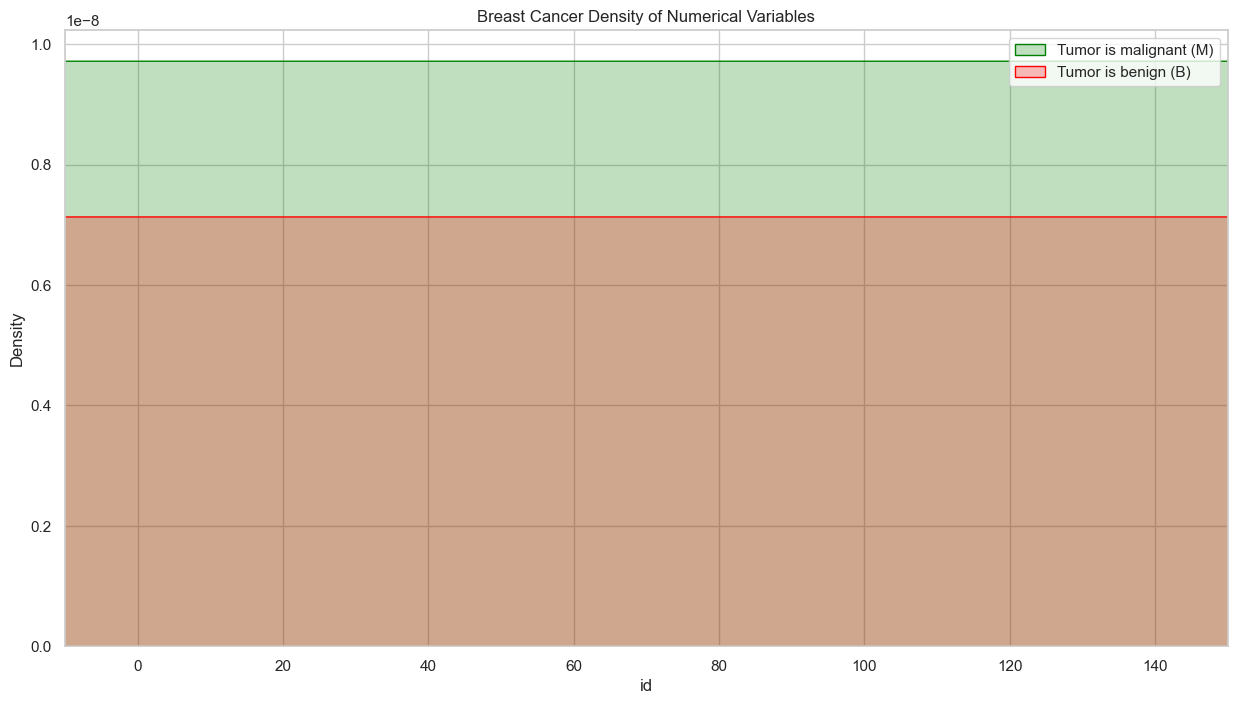

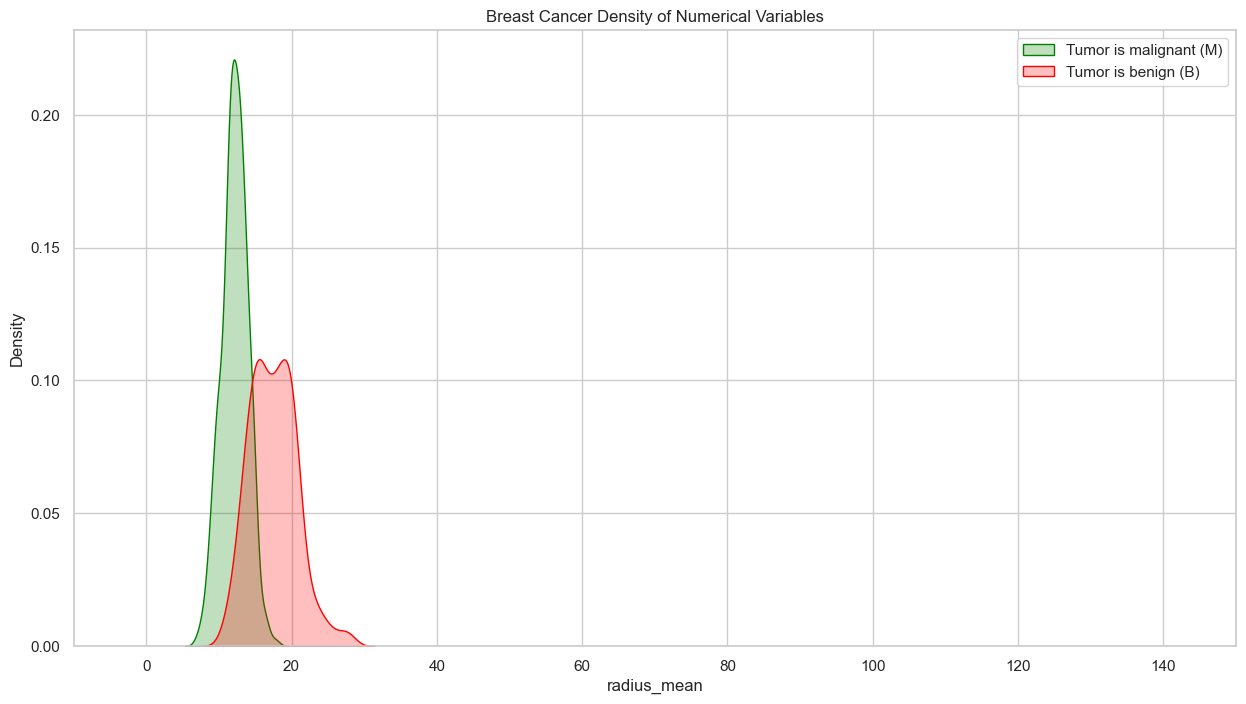

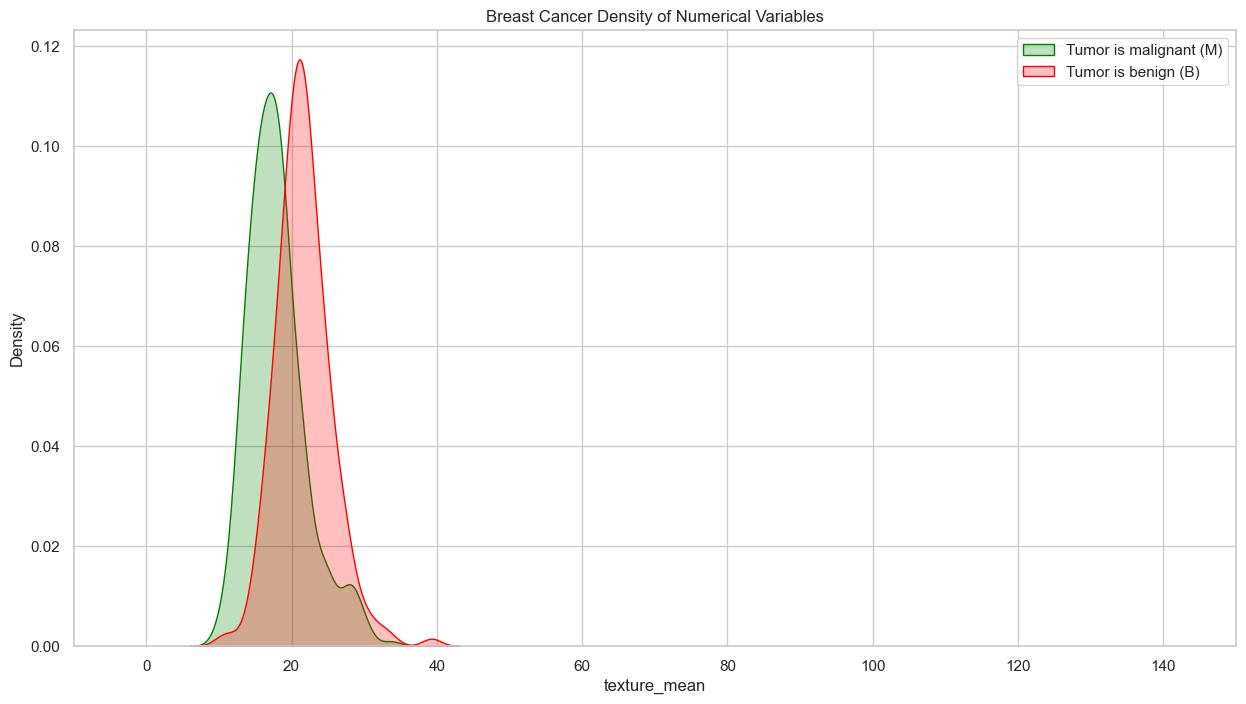

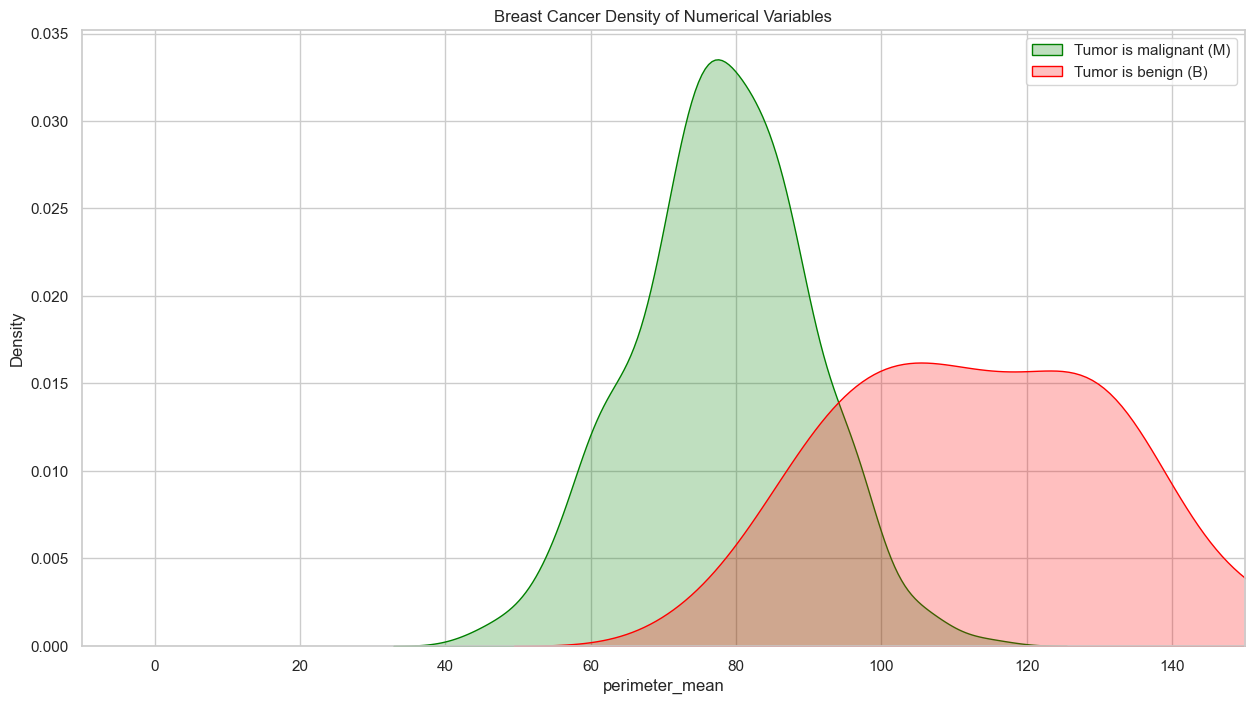

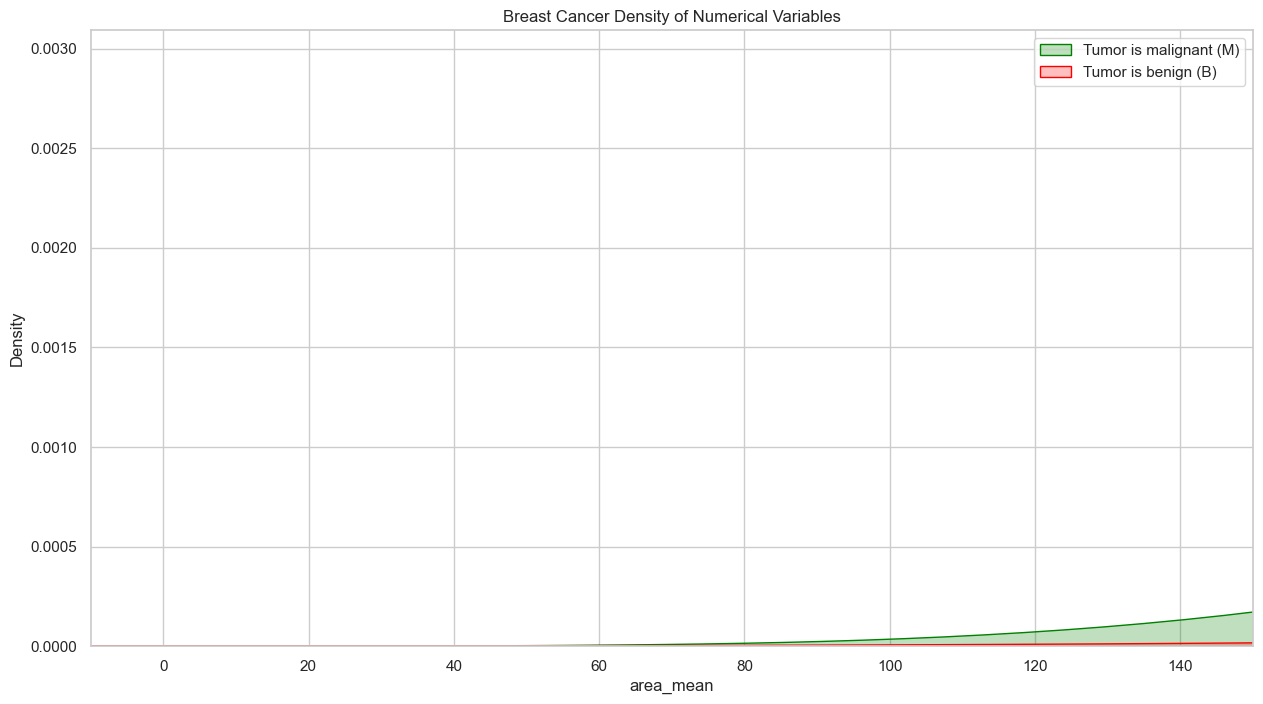

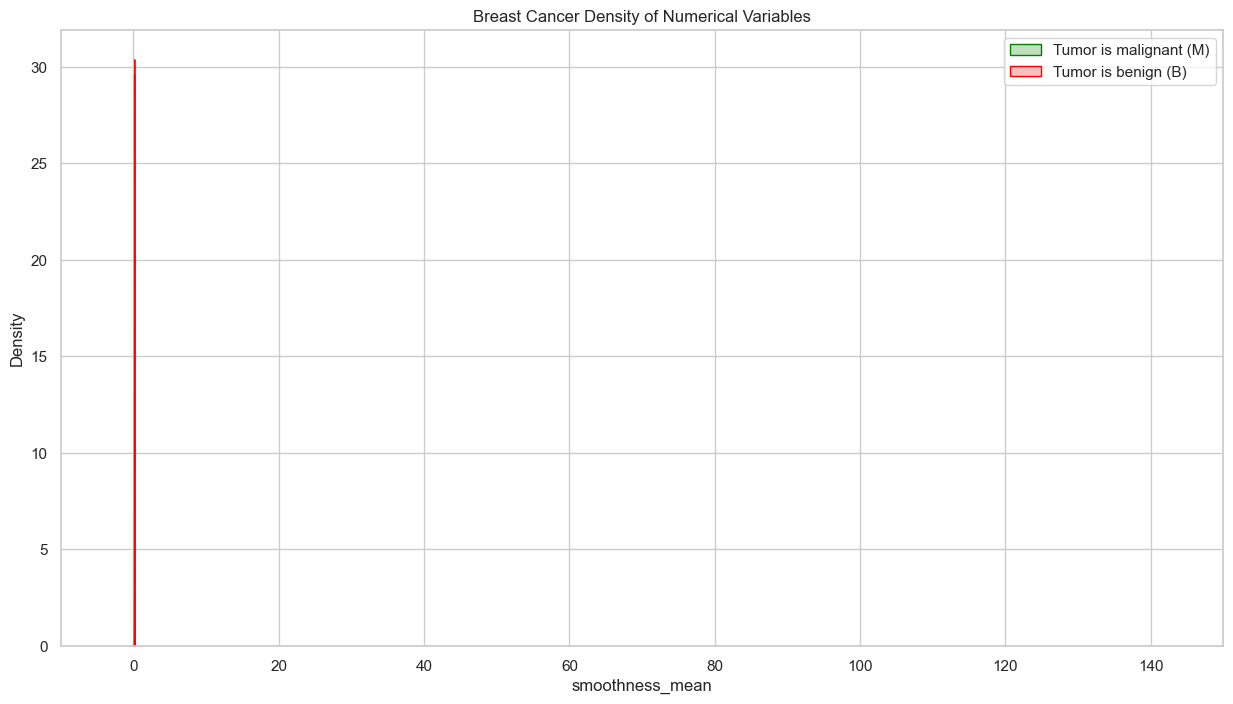

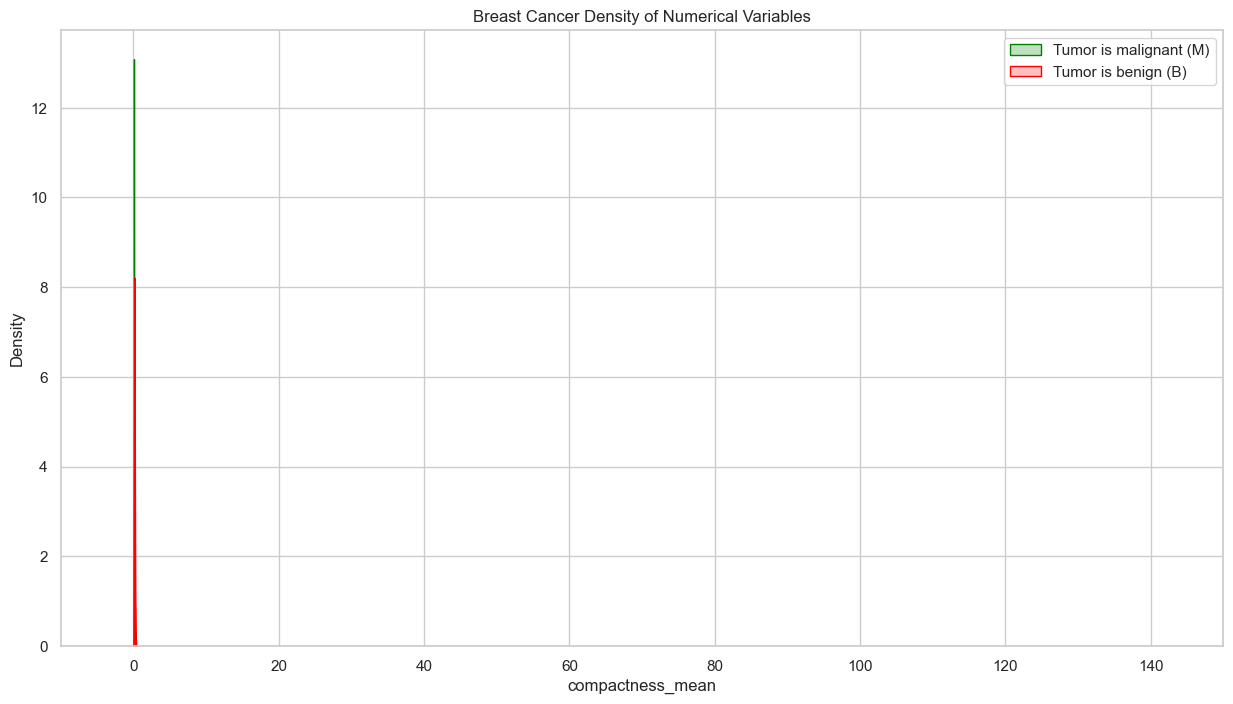

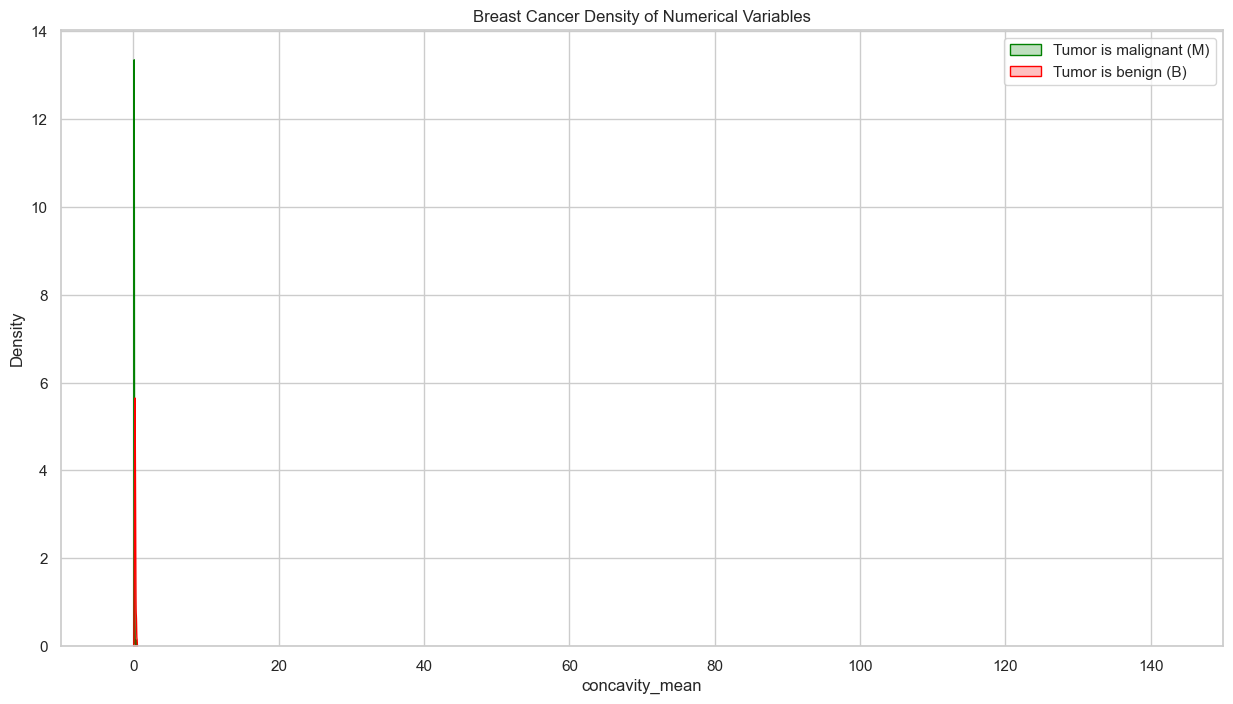

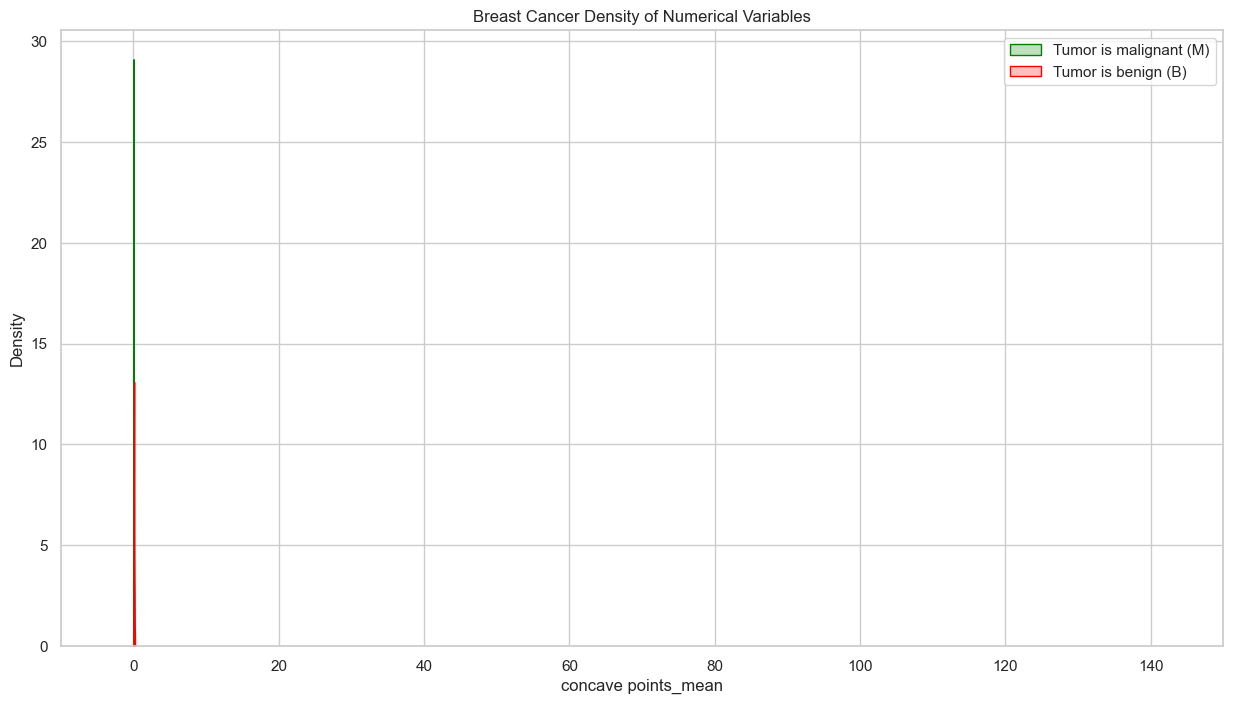

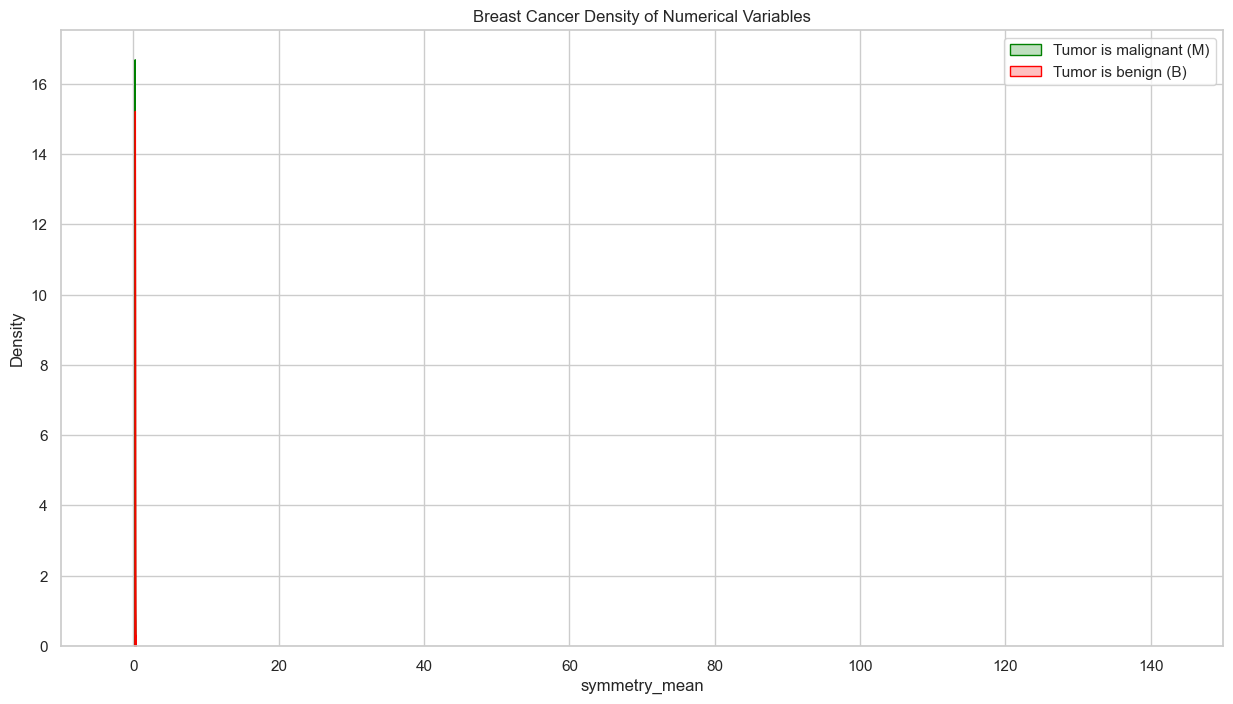

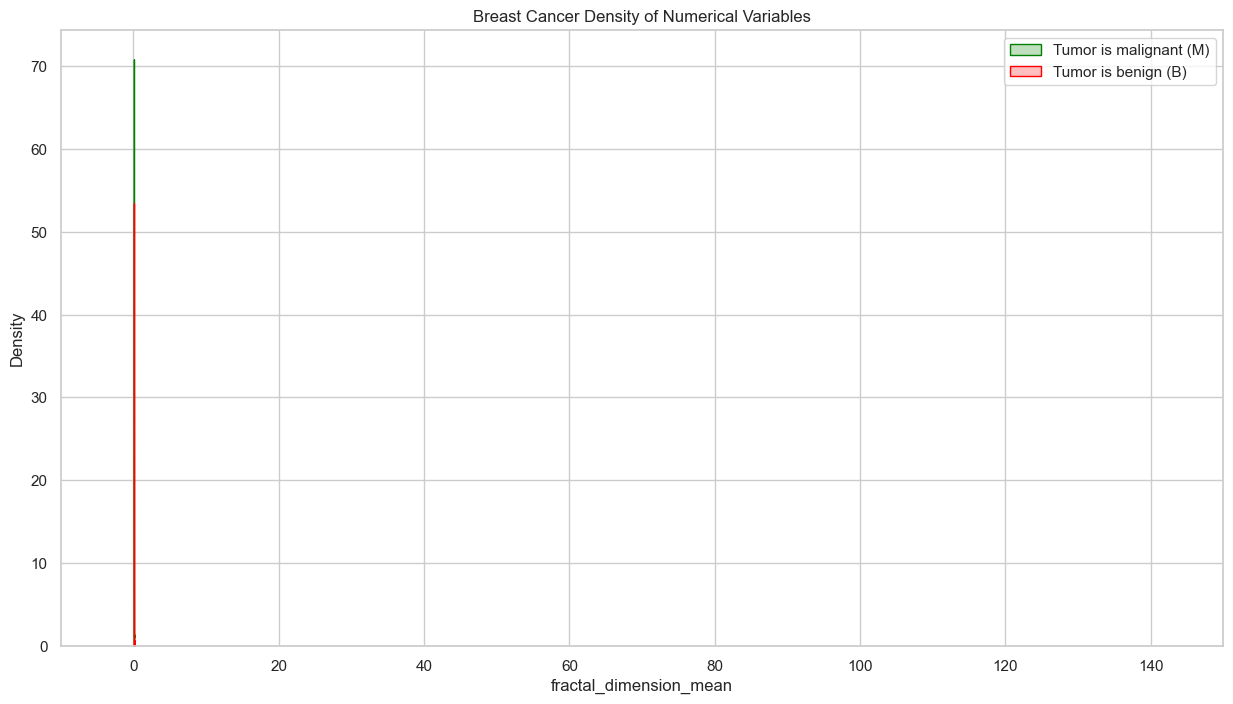

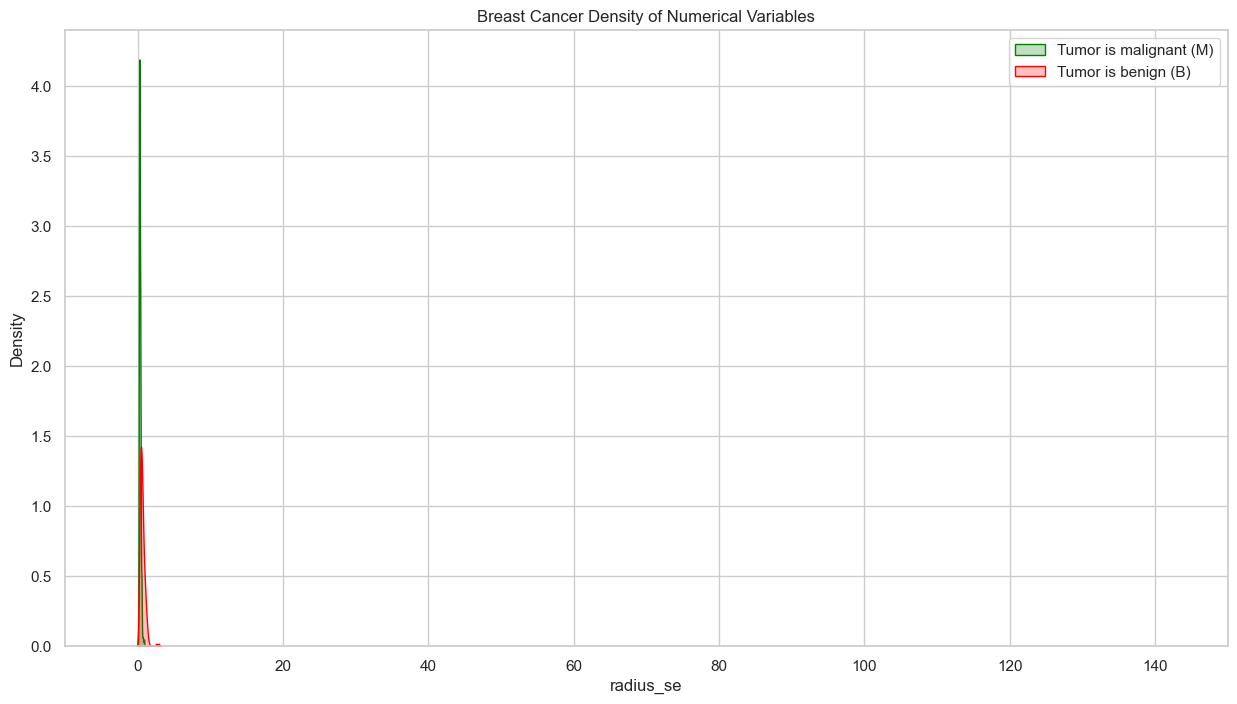

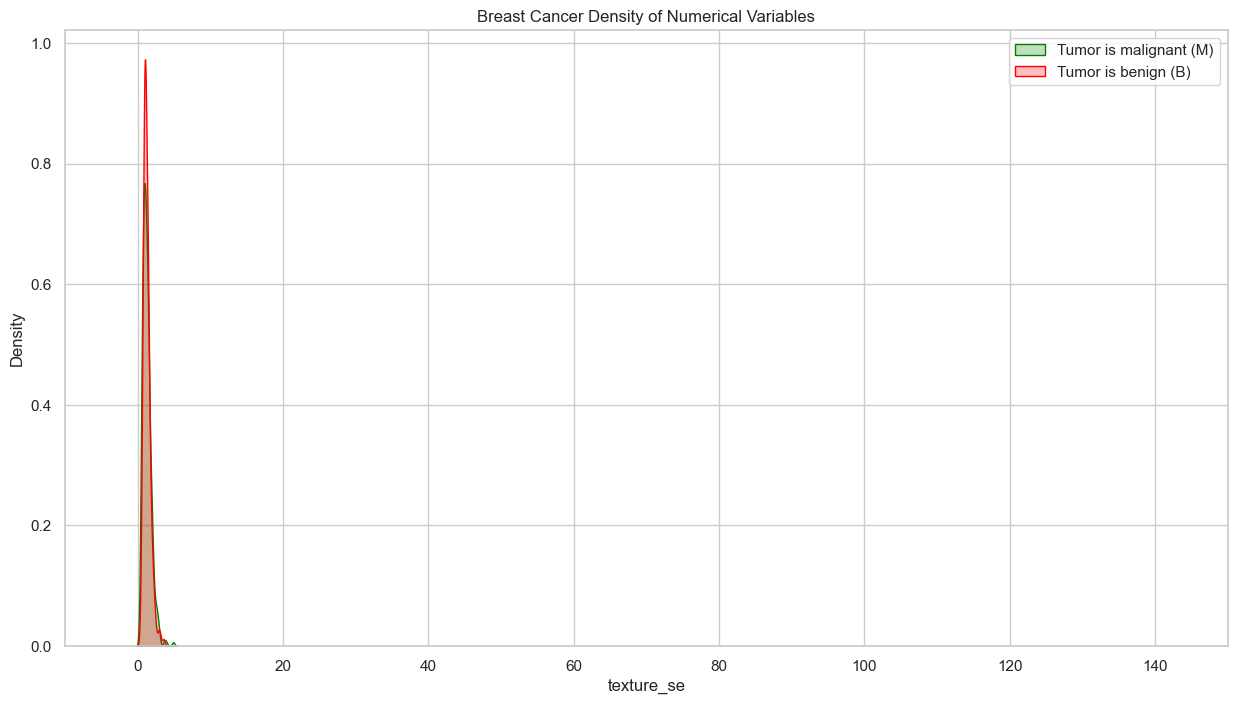

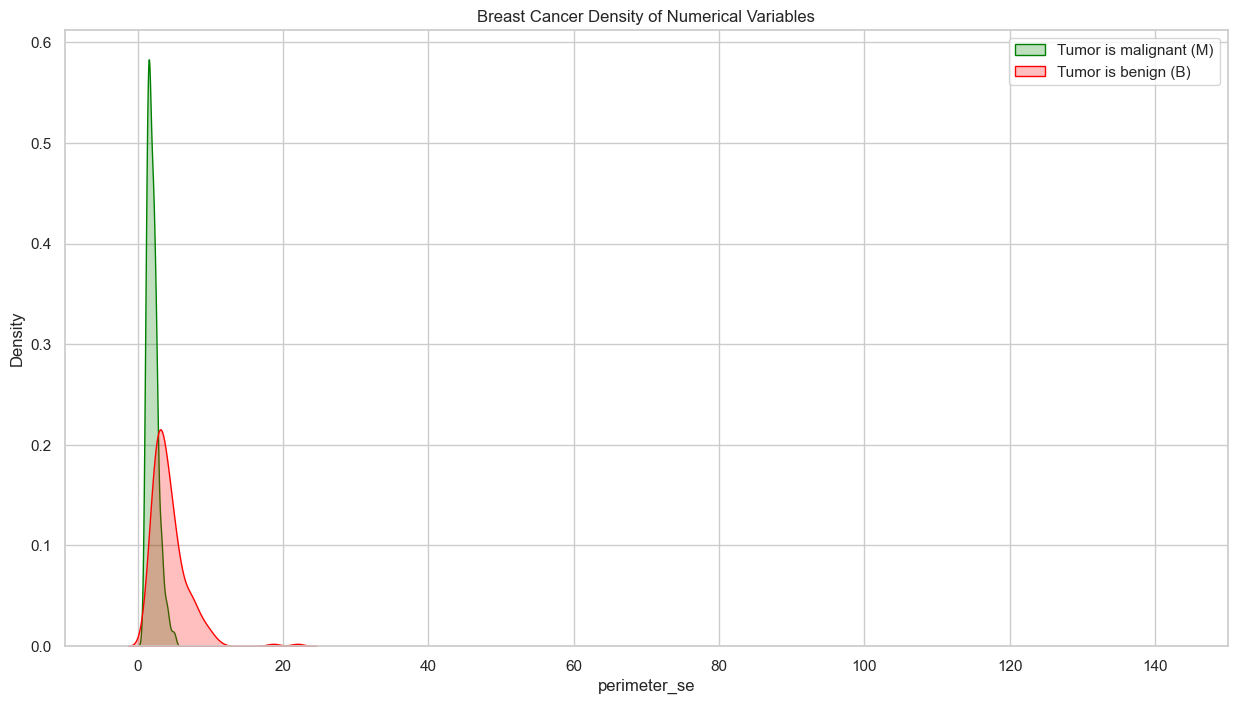

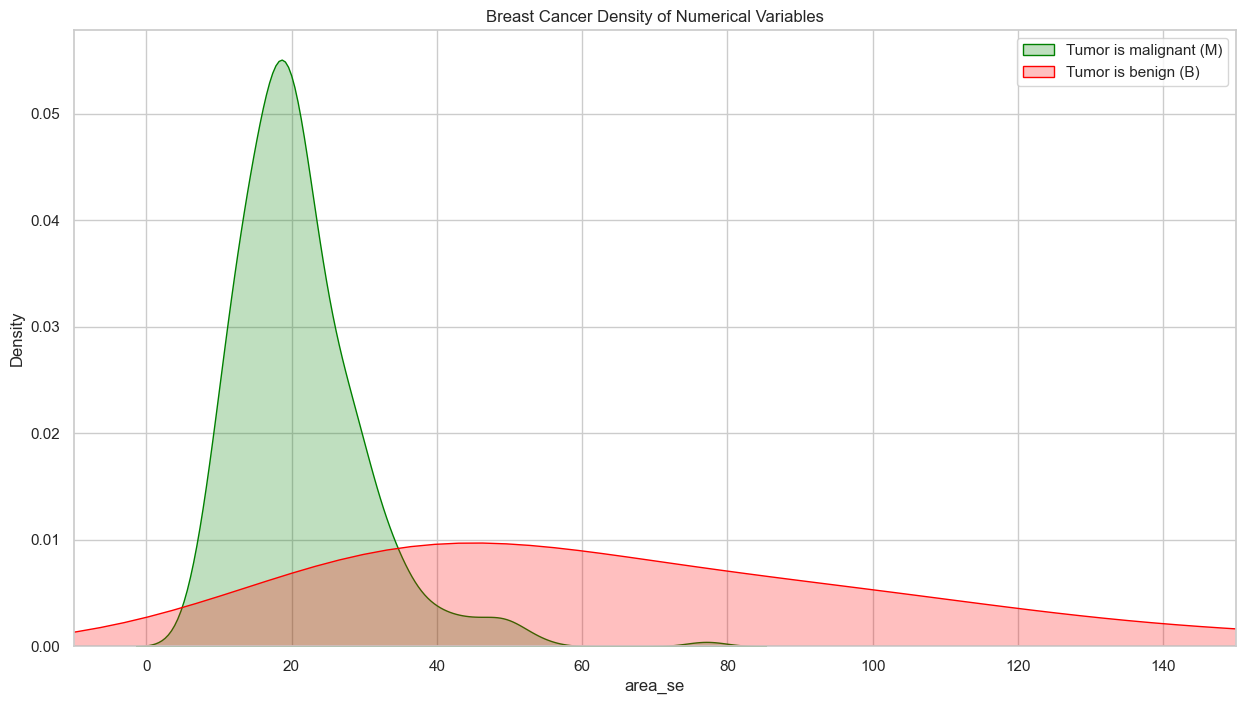

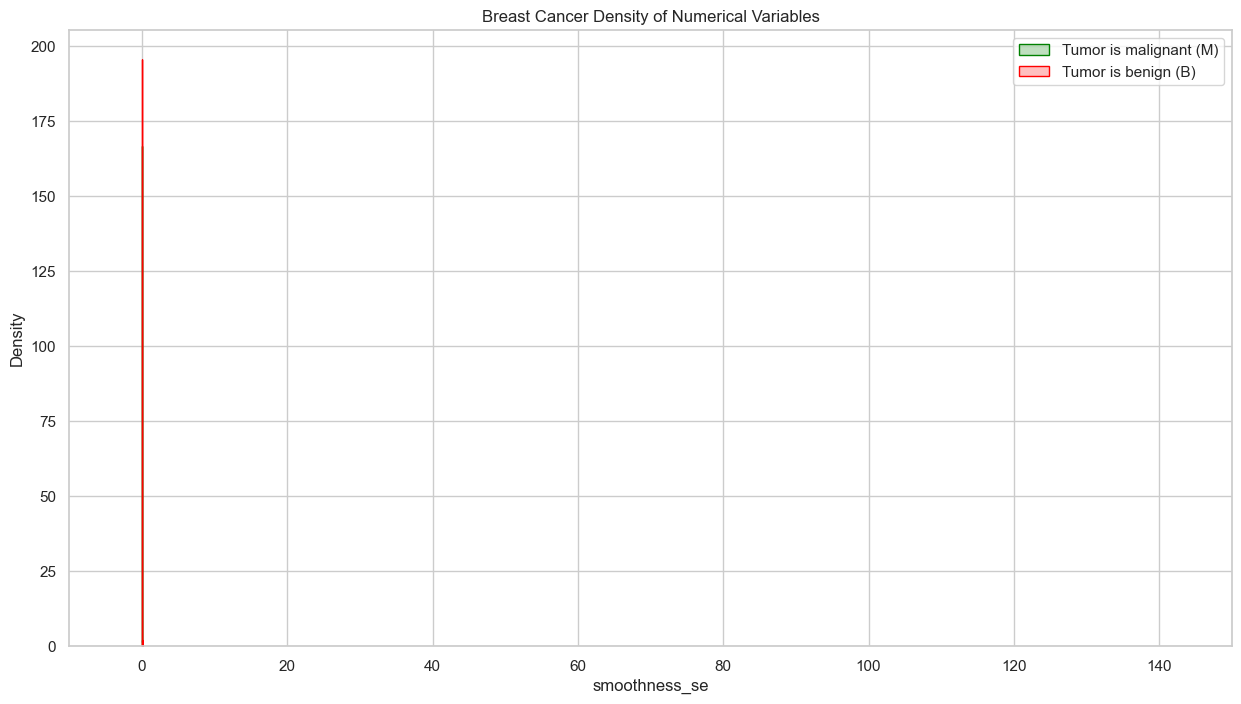

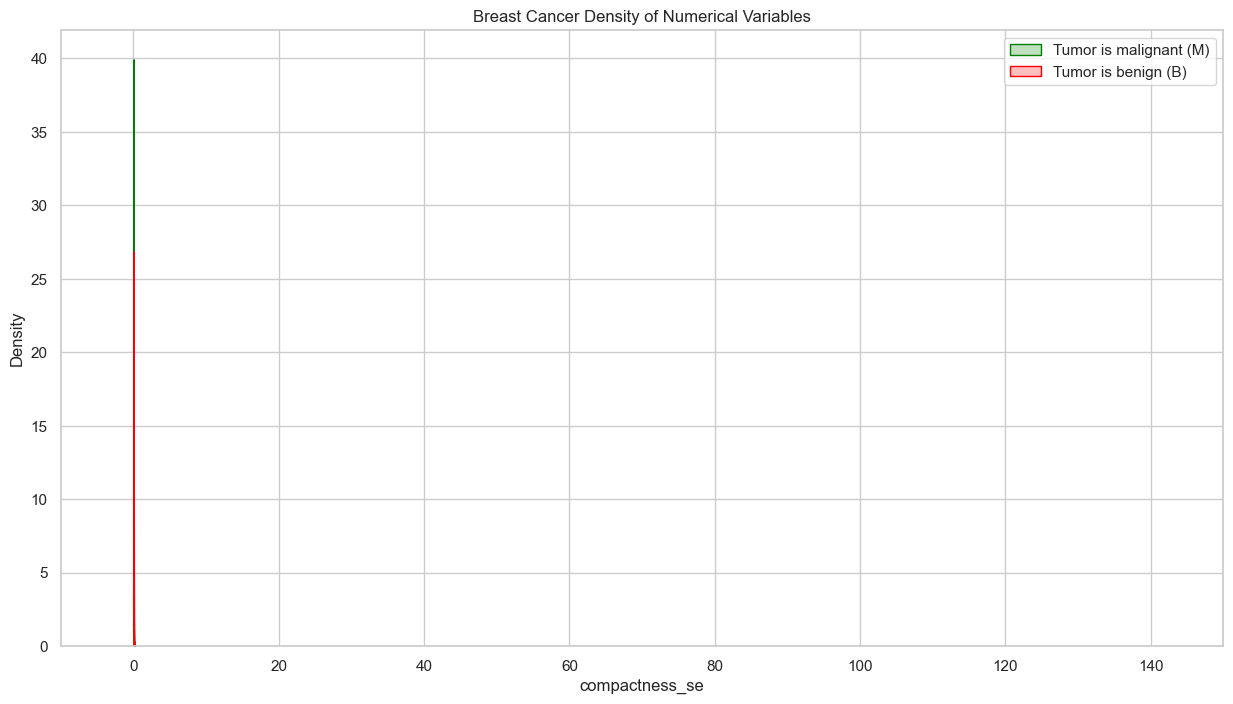

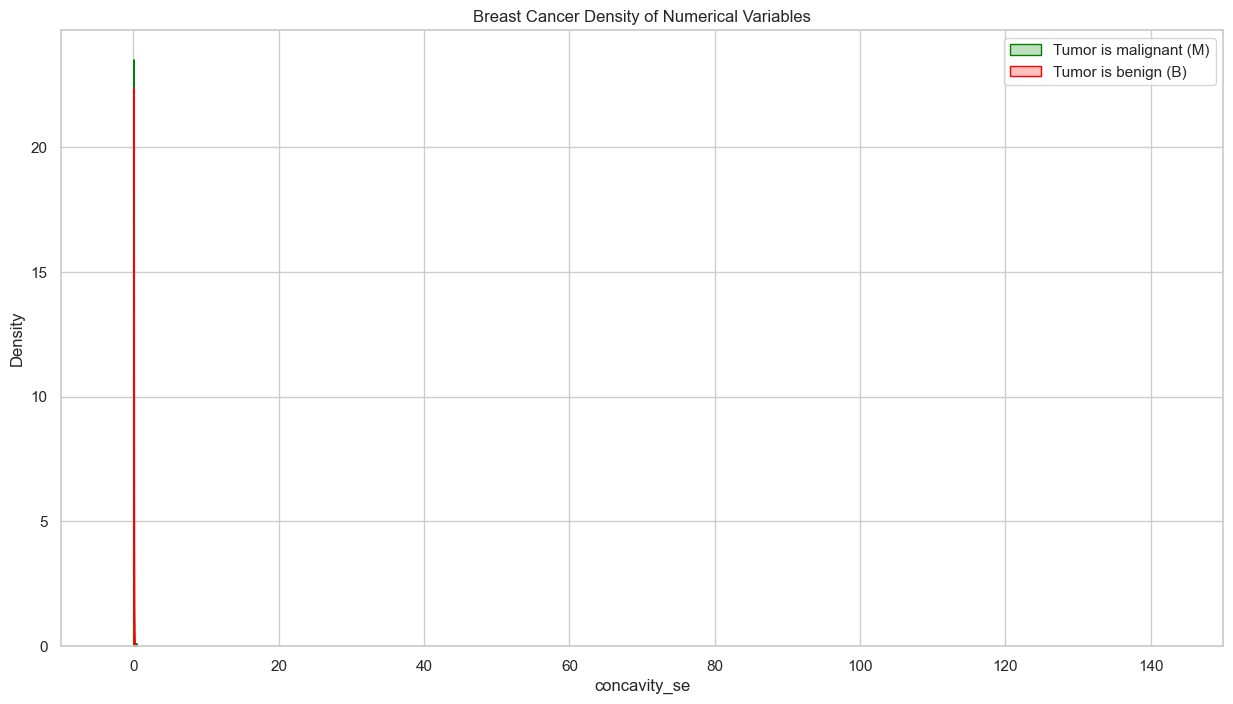

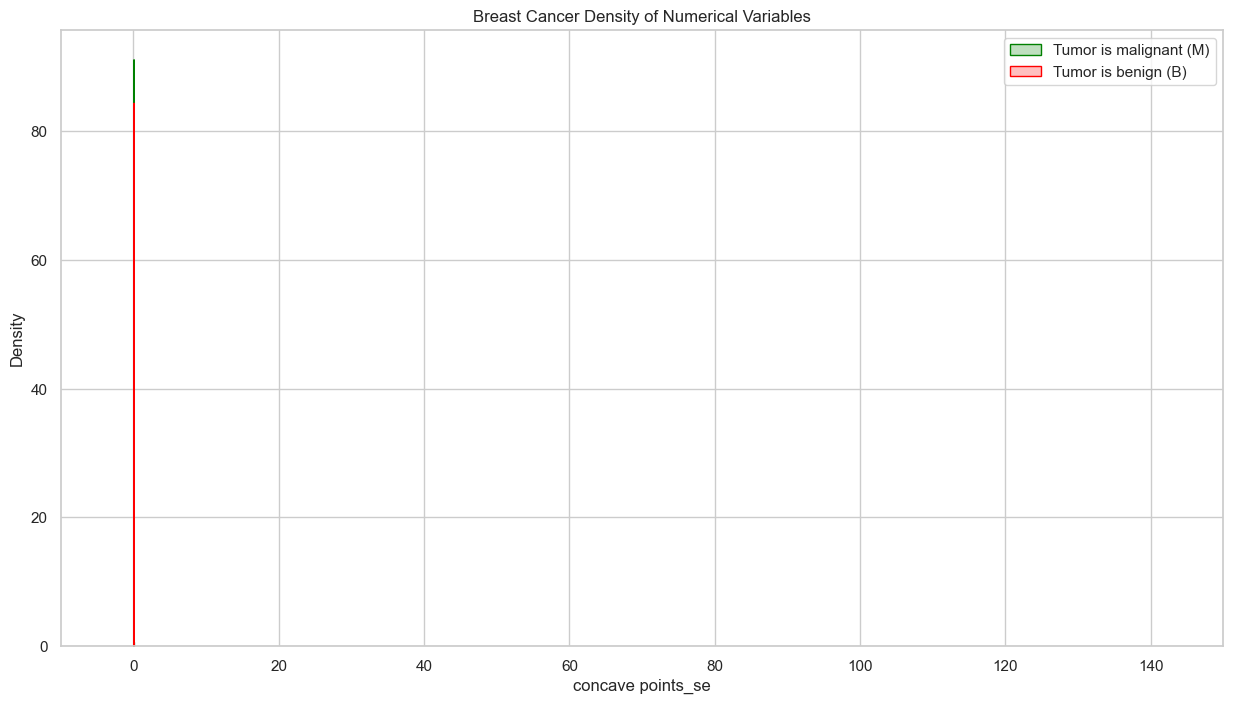

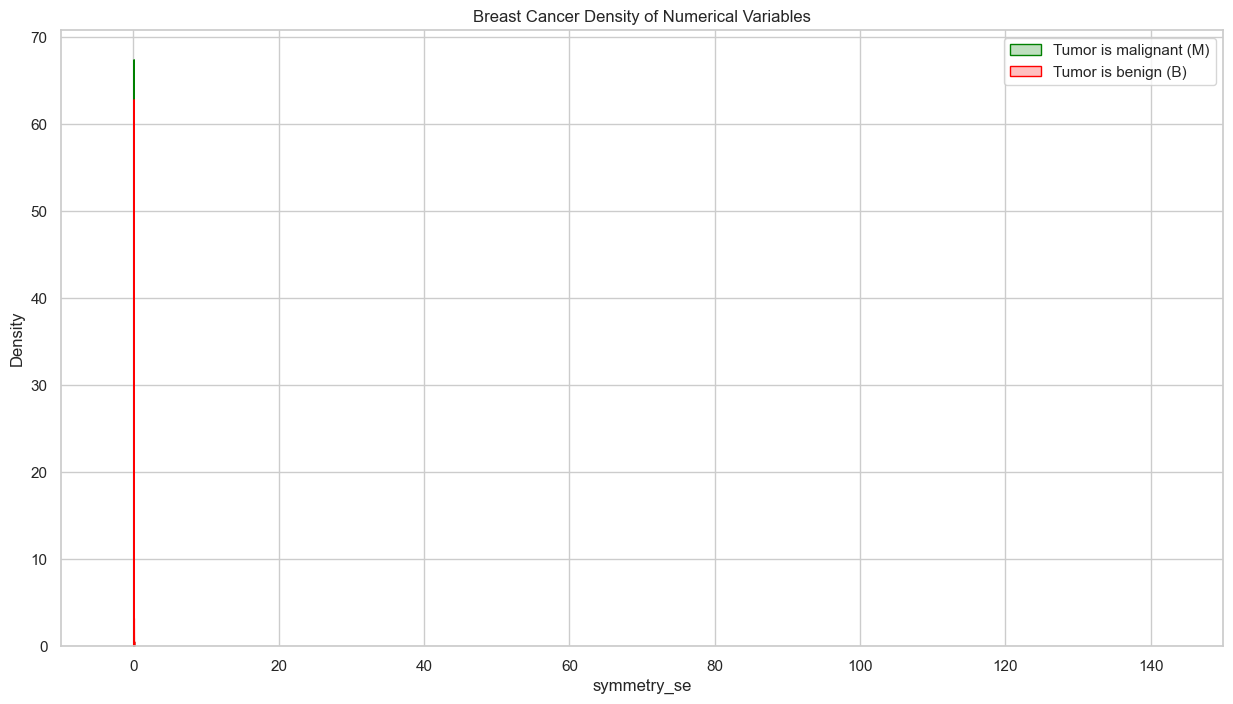

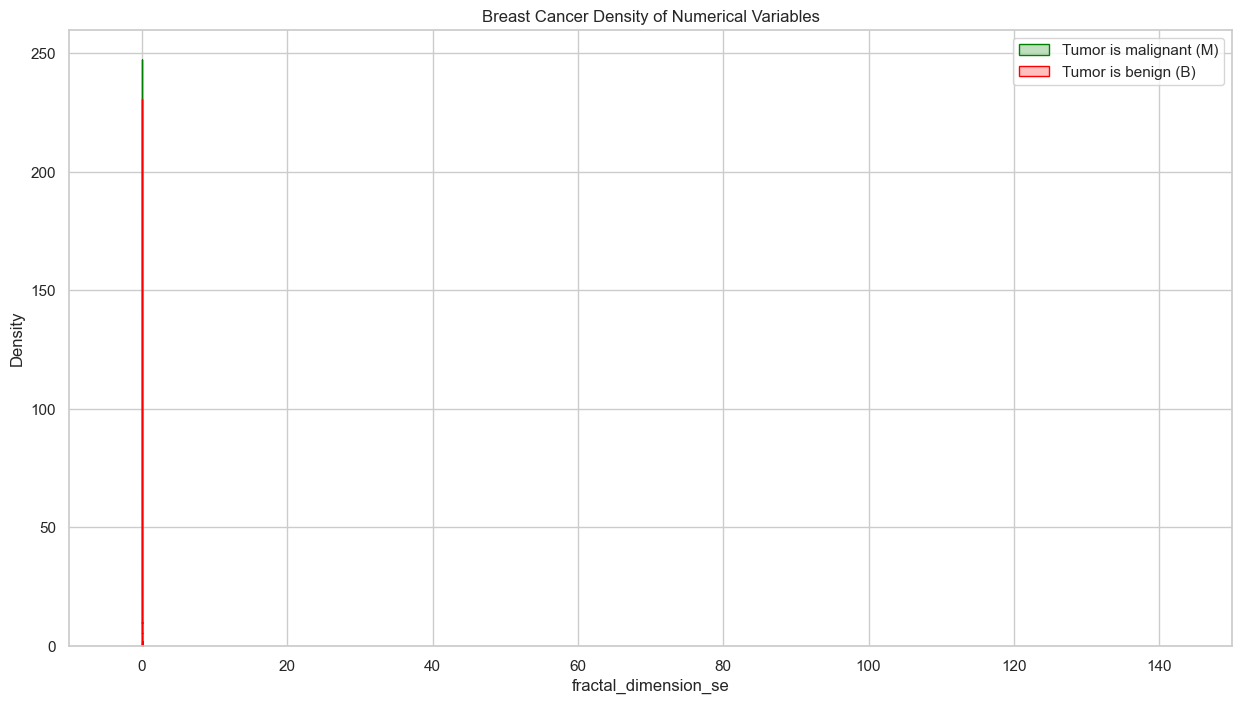

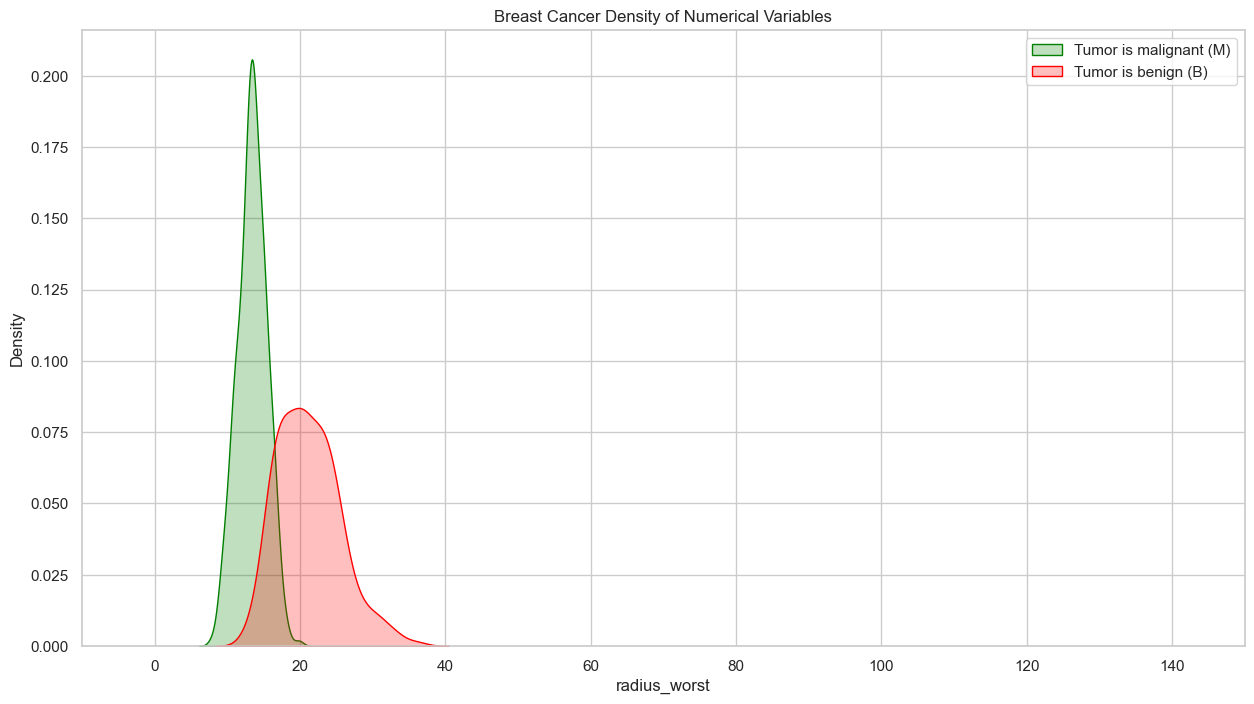

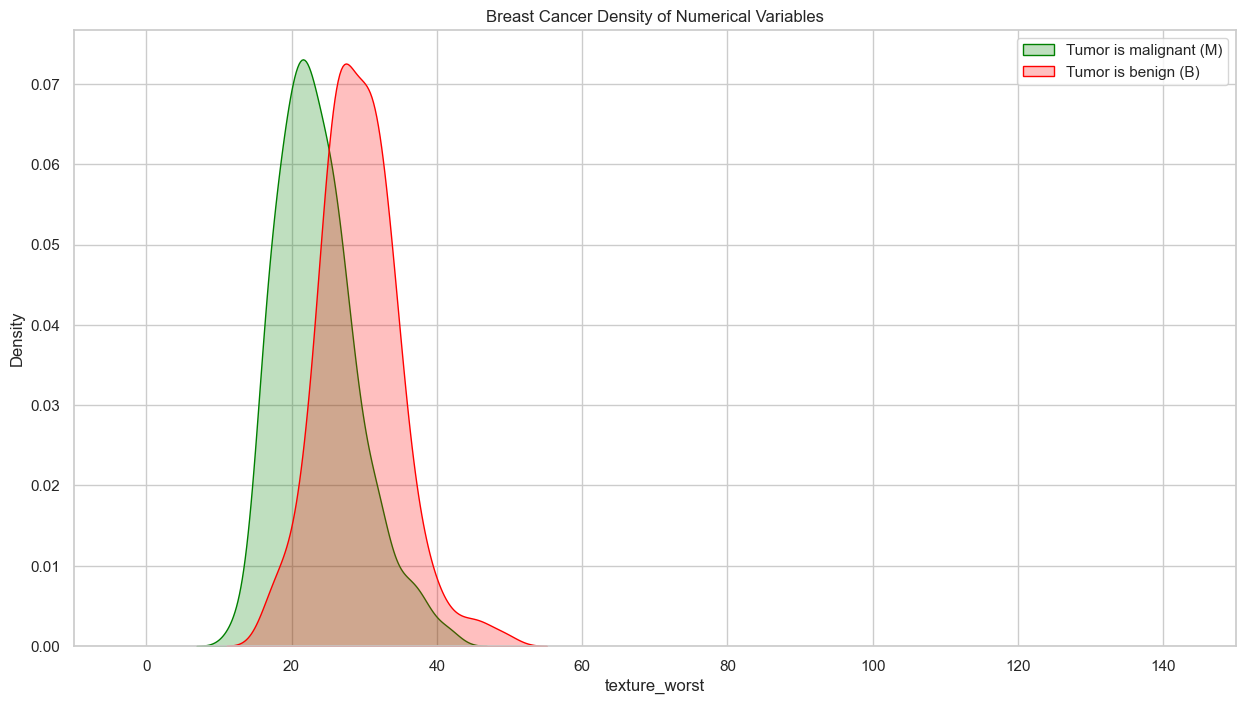

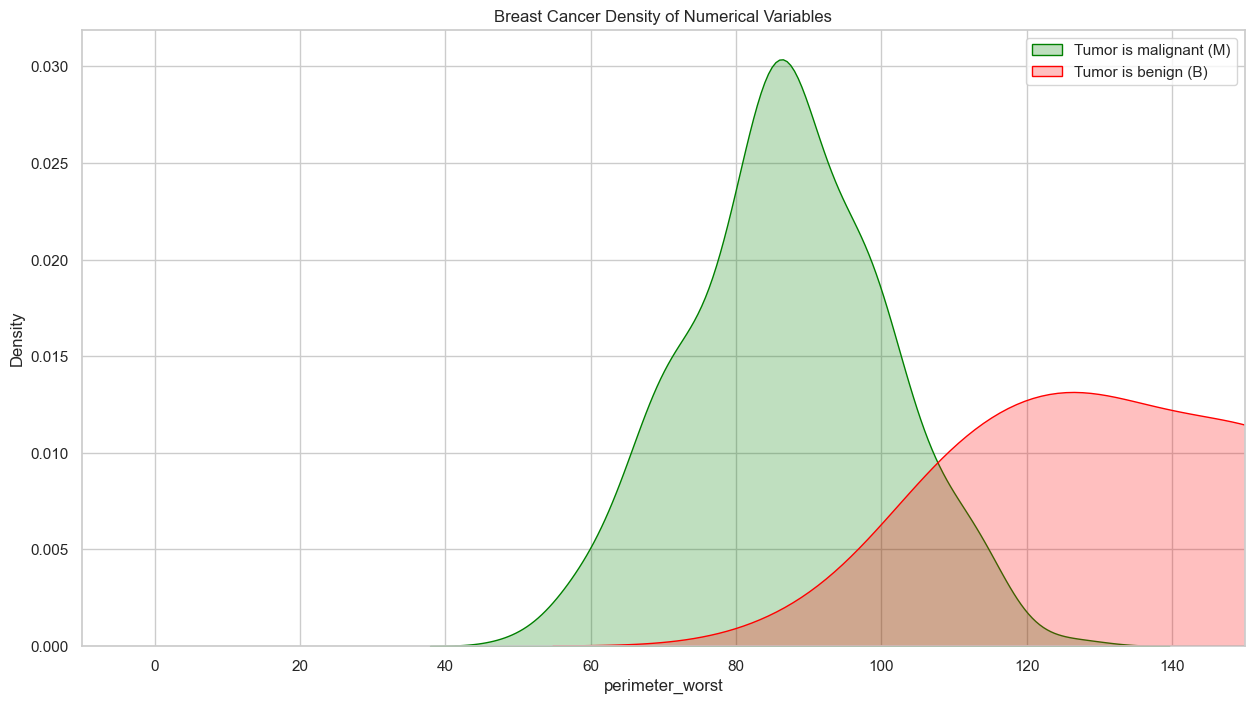

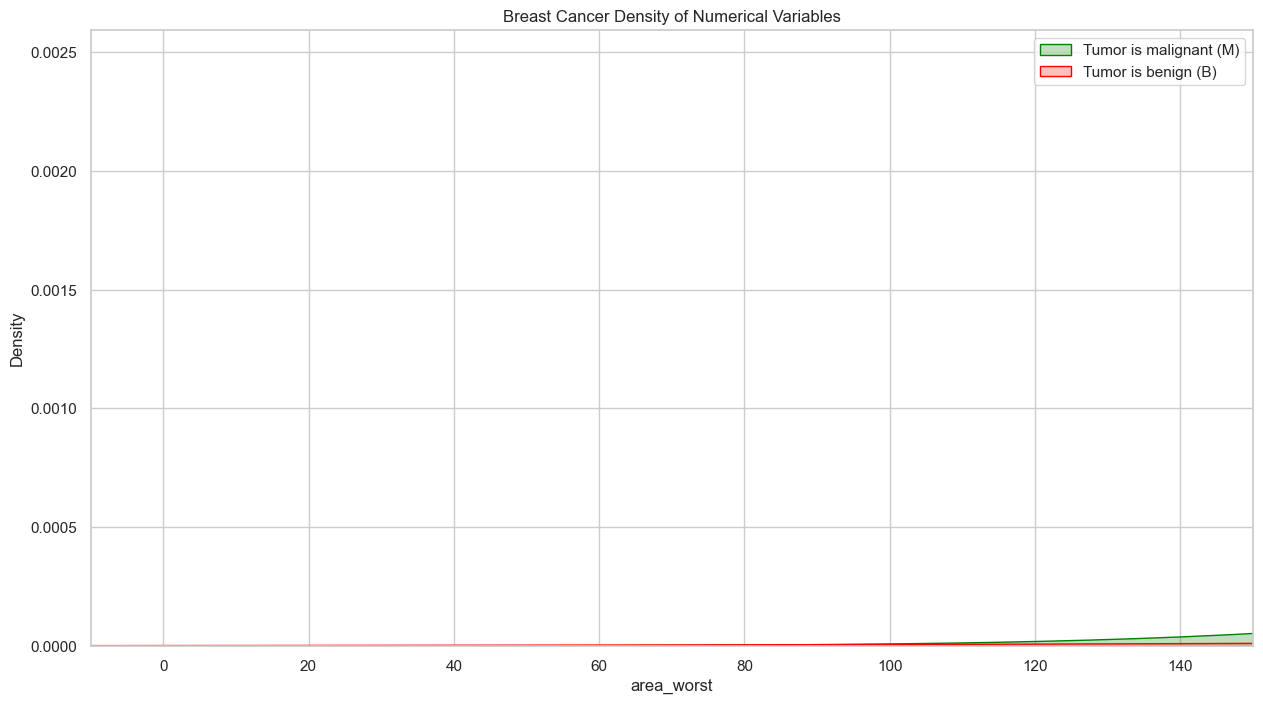

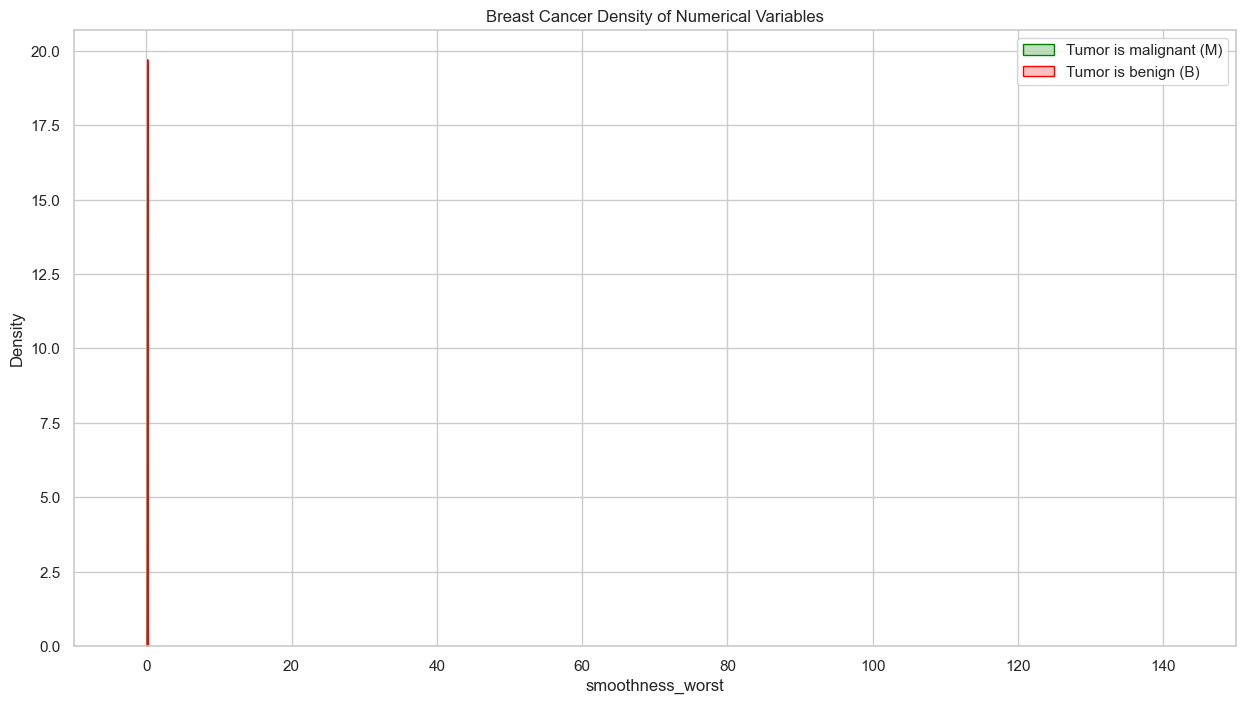

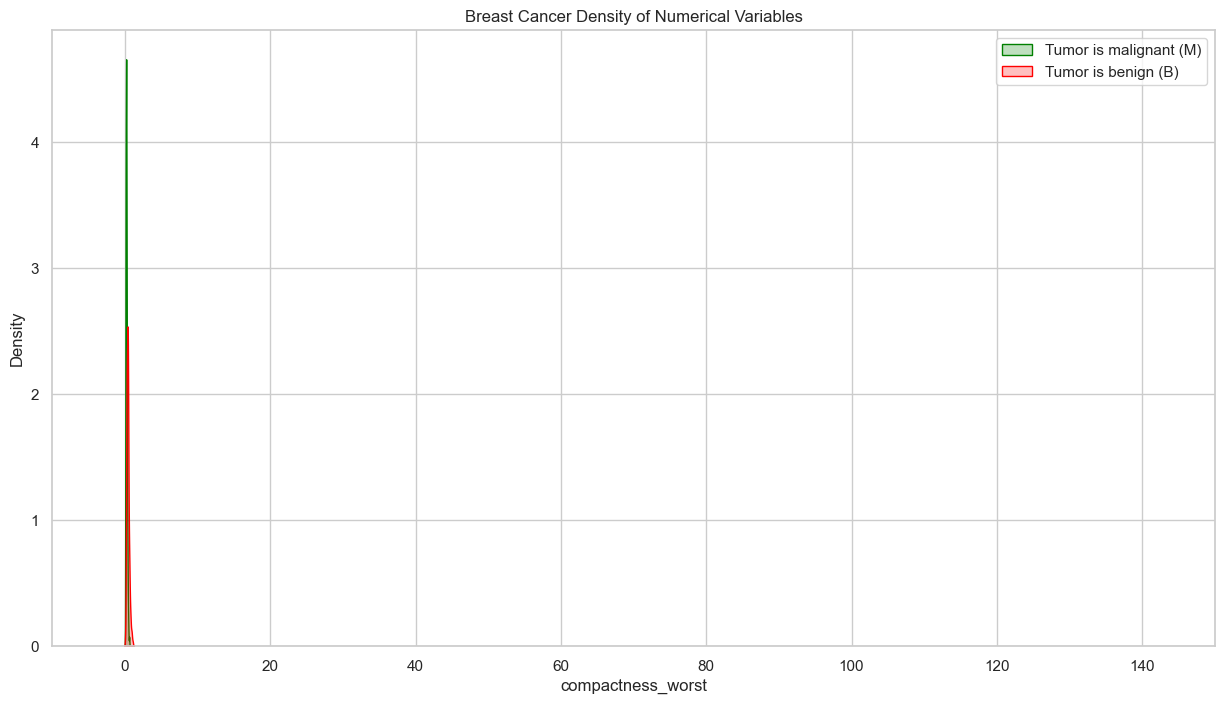

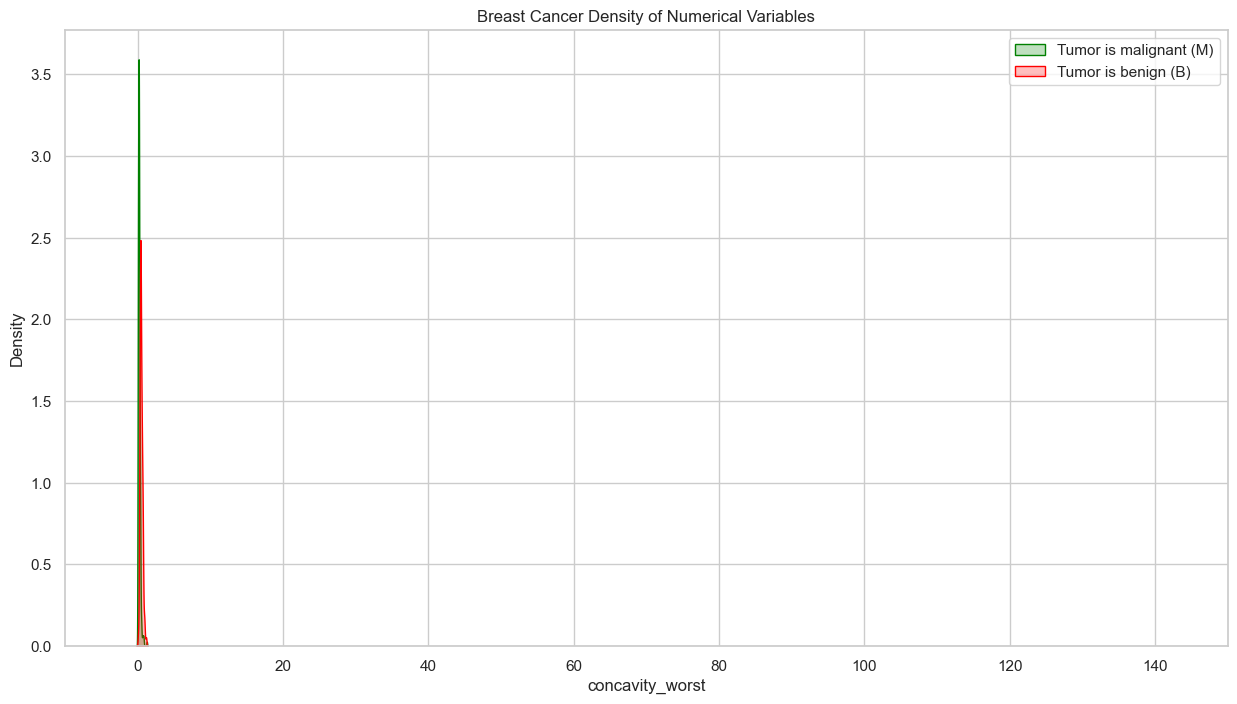

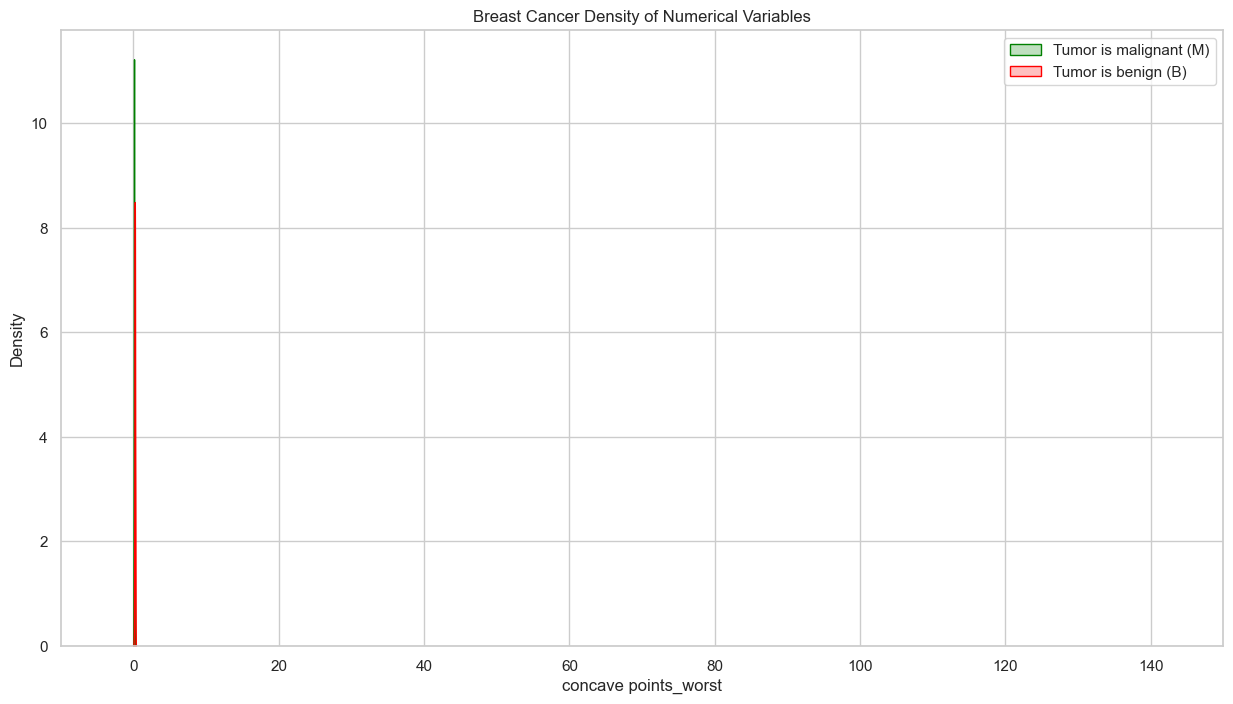

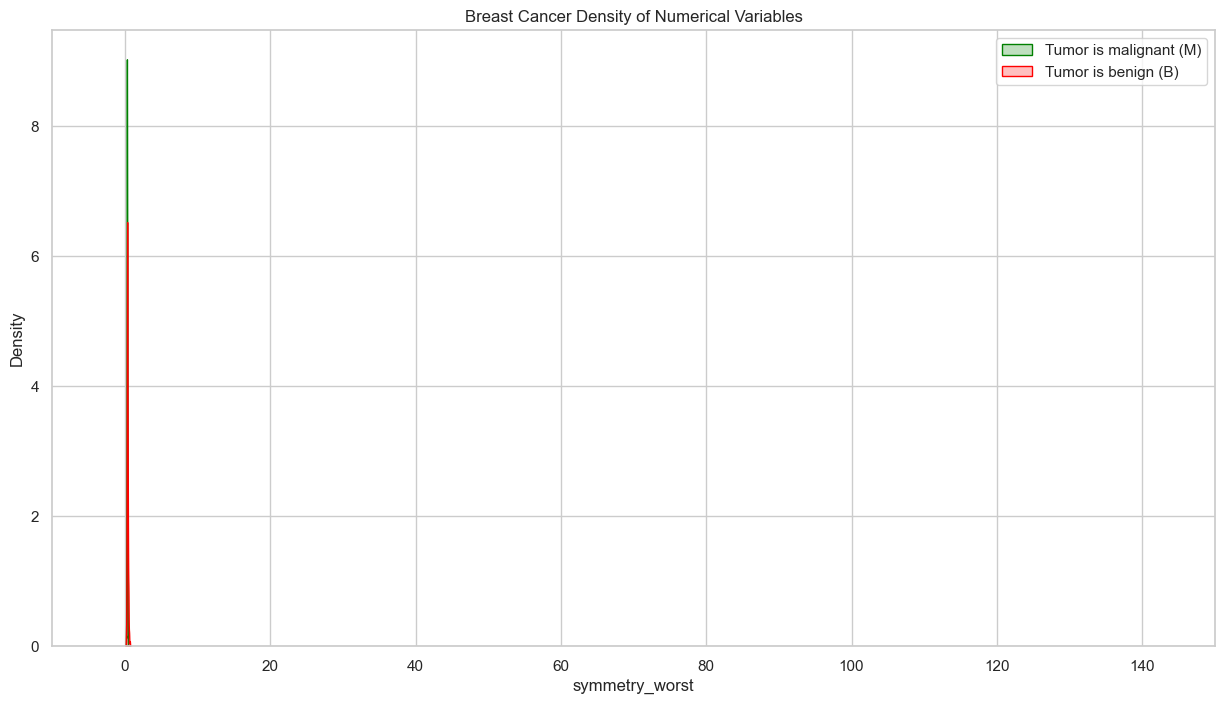

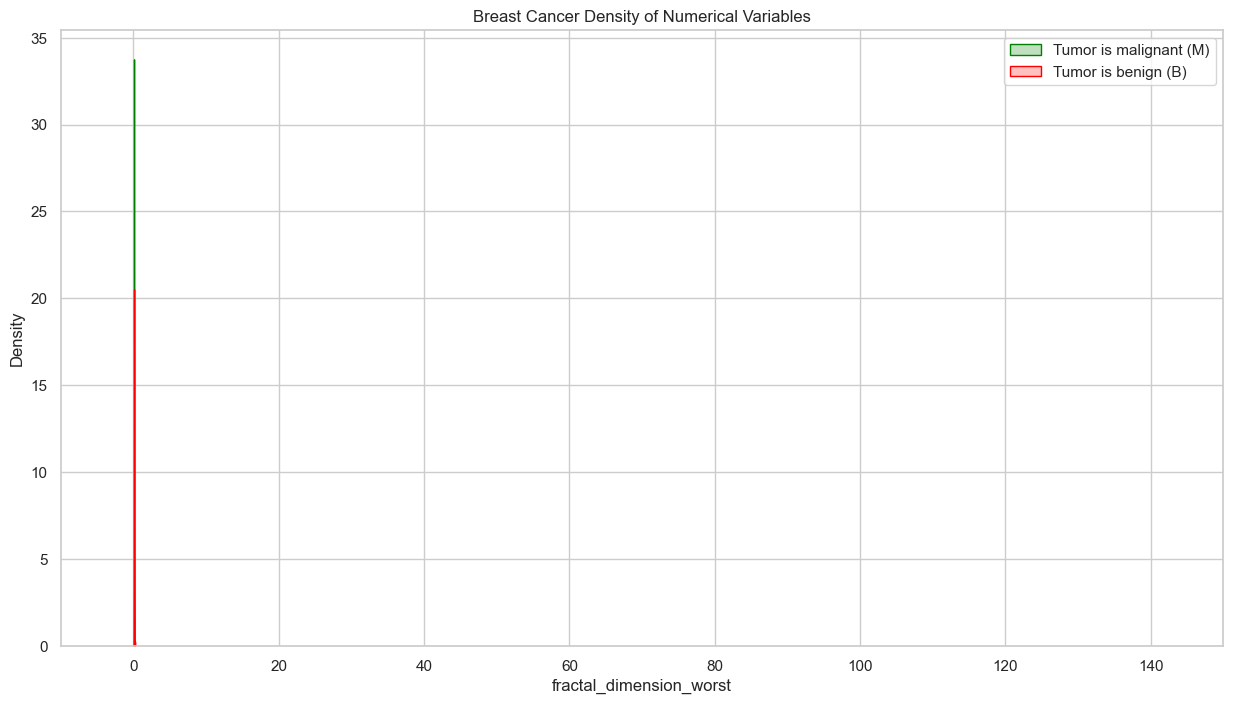

In [13]:
def target_density_est_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.diagnosis == "B"], color="green", shade=True)
    sns.kdeplot(df[col][df.diagnosis == "M"], color="red", shade=True)
    plt.legend(['Tumor is malignant (M)'  , 'Tumor is benign (B)'])
    plt.xlim(-10,150)
    plt.title("Breast Cancer Density of Numerical Variables")
    plt.show()
    
for col in num_cols:
    target_density_est_with_num(df,"diagnosis",col)
    #The target variable for classification is "diagnosis," which seems to indicate whether the tumor is malignant (M) or benign (B).

1.3.4.Outliers Analysis


Define a Function about outlier threshold for data columns

In [14]:
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Define a Function about checking outlier for data columns

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
for col in num_cols:
    print(col, check_outlier(df, col))

id True
radius_mean True
texture_mean True
perimeter_mean True
area_mean True
smoothness_mean True
compactness_mean True
concavity_mean True
concave points_mean True
symmetry_mean True
fractal_dimension_mean True
radius_se True
texture_se True
perimeter_se True
area_se True
smoothness_se True
compactness_se True
concavity_se True
concave points_se True
symmetry_se True
fractal_dimension_se True
radius_worst True
texture_worst True
perimeter_worst True
area_worst True
smoothness_worst True
compactness_worst True
concavity_worst True
concave points_worst False
symmetry_worst True
fractal_dimension_worst True


In [18]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [19]:
for col in num_cols:
    print(col, check_outlier(df, col))

id False
radius_mean False
texture_mean False
perimeter_mean False
area_mean False
smoothness_mean False
compactness_mean False
concavity_mean False
concave points_mean False
symmetry_mean False
fractal_dimension_mean False
radius_se False
texture_se False
perimeter_se False
area_se False
smoothness_se False
compactness_se False
concavity_se False
concave points_se False
symmetry_se False
fractal_dimension_se False
radius_worst False
texture_worst False
perimeter_worst False
area_worst False
smoothness_worst False
compactness_worst False
concavity_worst False
concave points_worst False
symmetry_worst False
fractal_dimension_worst False


1.3.5.The Missing Values Analysis

In [20]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

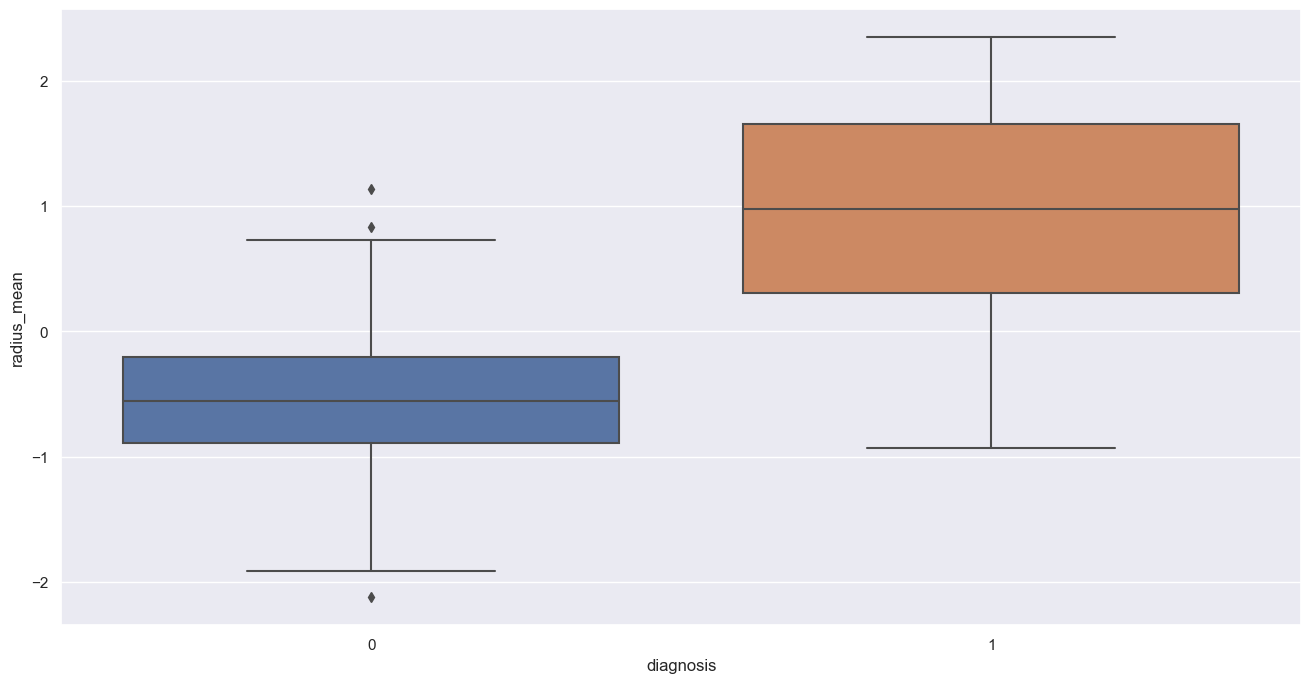

In [55]:
# Box plot for important features
plt.figure(figsize=(16, 8))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.show()

In [21]:
print(df.shape)

(569, 33)


# 1.3.6.Correlation Analysis

In [22]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
columns_to_drop = ['id', 'Unnamed: 32']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [24]:
dimension_variable = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
corr_matrix = df[dimension_variable].corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,-0.319056
texture_mean,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,-0.065946
perimeter_mean,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,-0.266586
area_mean,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,-0.303524
smoothness_mean,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,0.586706
compactness_mean,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,0.557003
concavity_mean,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,0.325513
concave points_mean,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,0.170028
symmetry_mean,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,0.471760
fractal_dimension_mean,-0.319056,-0.065946,-0.266586,-0.303524,0.586706,0.557003,0.325513,0.170028,0.471760,1.000000


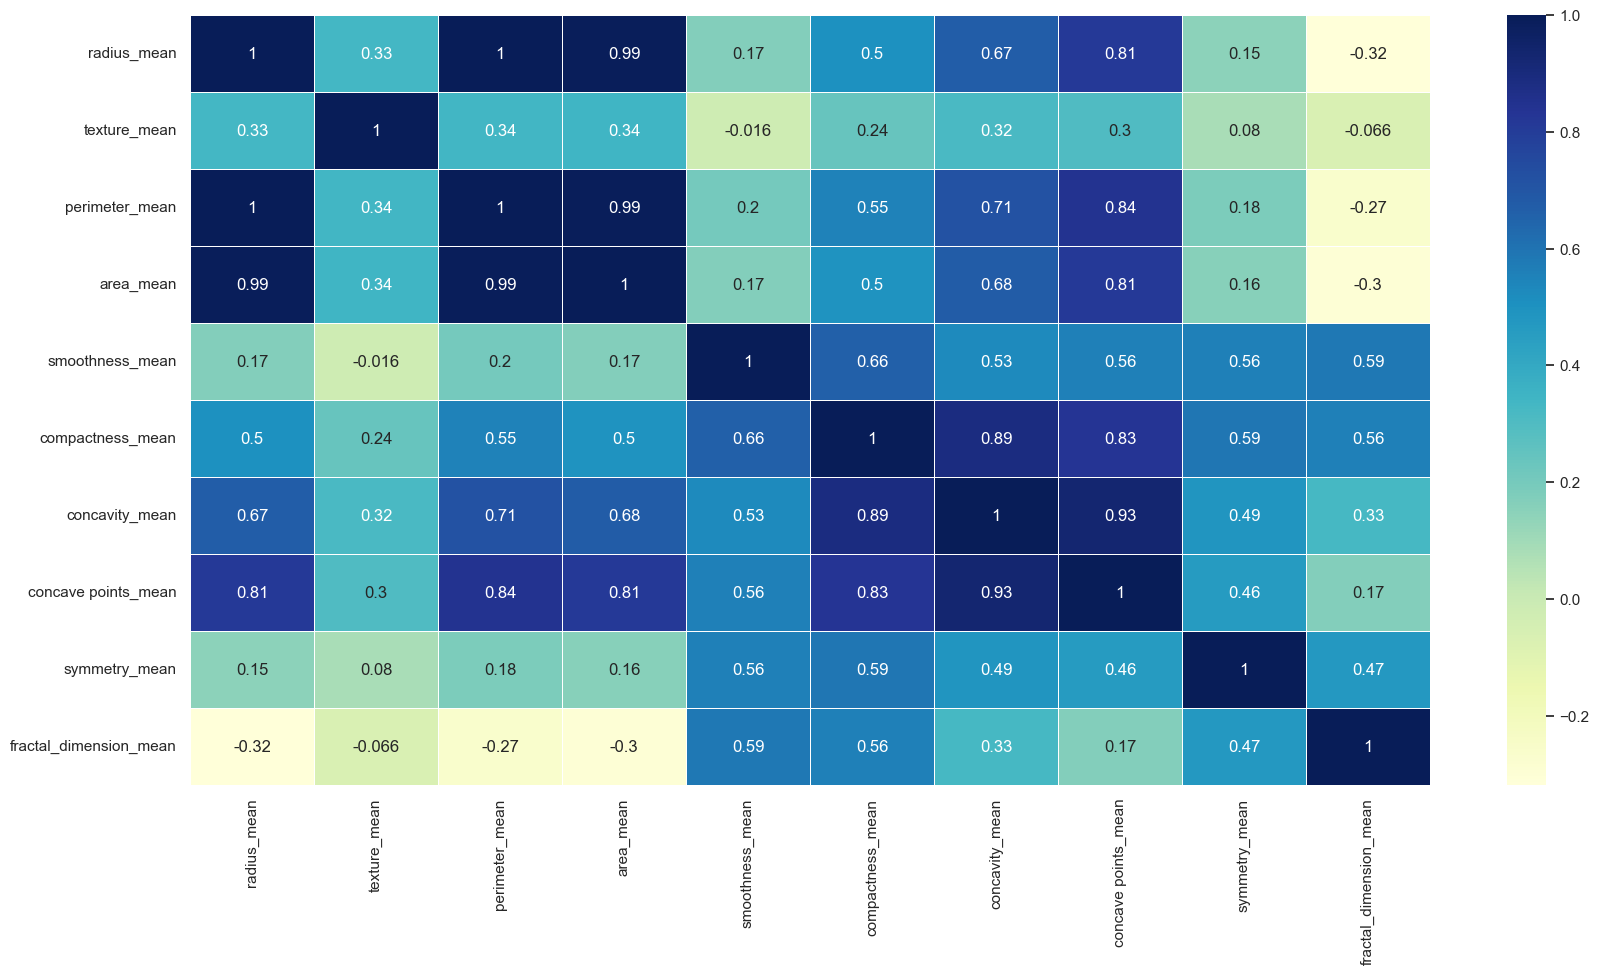

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) # maximizing the size of graph
ax = sns.heatmap(df[dimension_variable].corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)

# 2.FEATURE ENGINEERING

2.1.Processing for Missing Values and Outliers

In [26]:
def missing_values_table(df):
    for col in df.columns:
        if (df[dimension_variable][col].isnull()).any() == True:
            print('------- Processing ' + col + ' Column ----------------')
            totalNulls = df[dimension_variable][col].isnull().sum()
            ratio =  (totalNulls / len(df[col])) * 100 
            print(col, totalNulls, ratio, '\n')
            nullCols_list.append((col, totalNulls, ratio))
            na_cols.append(col)
        else:
            pass
    return nullCols_list, na_cols

In [27]:
nullCols_list = []
na_cols = []
nullCols_list, na_cols = missing_values_table(df[dimension_variable])

Define a Function about comparing target variable with missing values

In [28]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "daignosis", na_cols)

In [29]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [30]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [31]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


Standardization of variables

In [32]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,...,0.893497,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,1.0,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,...,0.873528,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,1.0,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,...,0.800819,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741
3,1.0,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,...,0.357399,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000
4,1.0,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,...,0.748080,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847


Implement the KNN method

In [33]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [34]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,...,0.893497,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,1.0,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,...,0.873528,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,1.0,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,...,0.800819,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741
3,1.0,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,...,0.357399,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000
4,1.0,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,...,0.748080,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847


3.2.Standardization for Numerical Variables

In [35]:
num_cols

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [36]:
scaler = StandardScaler()

In [37]:
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [39]:
# Data Splitting
X = df.iloc[:, 1:]
y = df['diagnosis']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#df[num_cols] = scaler.fit_transform(df[num_cols])

# Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=46)
scores = cross_val_score(model, X, y, cv=5)

In [43]:
scores.mean()

0.9560937742586555

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9649122807017544

# 3.5 Confusion Matrix & Classification Report

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [46]:
print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

True Positive =  40
True Negative =  70
False Positive =  1
False Negative =  3


In [47]:
from sklearn.metrics import classification_report
target_names = ['Malignant', 'Benign']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Malignant       0.96      0.99      0.97        71
      Benign       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




The classification report provides a detailed overview of the performance of a classification model. Here's how to interpret the key metrics:

Precision: Out of all the instances predicted as Malignant, 96% were actually Malignant, and out of all the instances predicted as Benign, 98% were actually Benign.

Recall (Sensitivity): Of all the Malignant instances in the dataset, the model correctly identified 99%. For Benign instances, the recall is 93%.

F1-score: It's the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, it's 97% for Malignant and 95% for Benign.

Support: The number of actual occurrences of the class in the specified dataset. For example, there were 71 instances of Malignant and 43 instances of Benign.

Accuracy: Overall, the model correctly predicted the class for 96% of the instances.

Macro avg: The unweighted average of precision, recall, and F1-score for both classes. In this case, it's 97% for precision, 96% for recall, and 96% for F1-score.

Weighted avg: The weighted average of precision, recall, and F1-score, weighted by the number of instances in each class. It's 97% for precision, 96% for recall, and 96% for F1-score.


In [48]:
primitive_success=[]
model_names=[]
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

def ML(algName):

    # Model Building / Training
    model=algName().fit(X_train,y_train)
    model_name=algName.__name__
    model_names.append(model_name)
    # Prediction
    y_pred=model.predict(X_test)
    # primitive-Success / Verification Score
    from sklearn.metrics import accuracy_score
    primitiveSuccess=accuracy_score(y_test,y_pred)
    primitive_success.append(primitiveSuccess)
    return  primitive_success,model_names,model

In [49]:
models=[KNeighborsClassifier,LogisticRegression ,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier]
for i in models:
    ML(i)


classification=pd.DataFrame( primitive_success,columns=
                                 ['accuracy_Score'],index=[model_names]).sort_values(by='accuracy_Score',ascending=False)
classification

,accuracy_Score
SVC,0.988304
KNeighborsClassifier,0.982456
LogisticRegression,0.982456
RandomForestClassifier,0.970760
XGBClassifier,0.964912
GradientBoostingClassifier,0.953216
DecisionTreeClassifier,0.935673


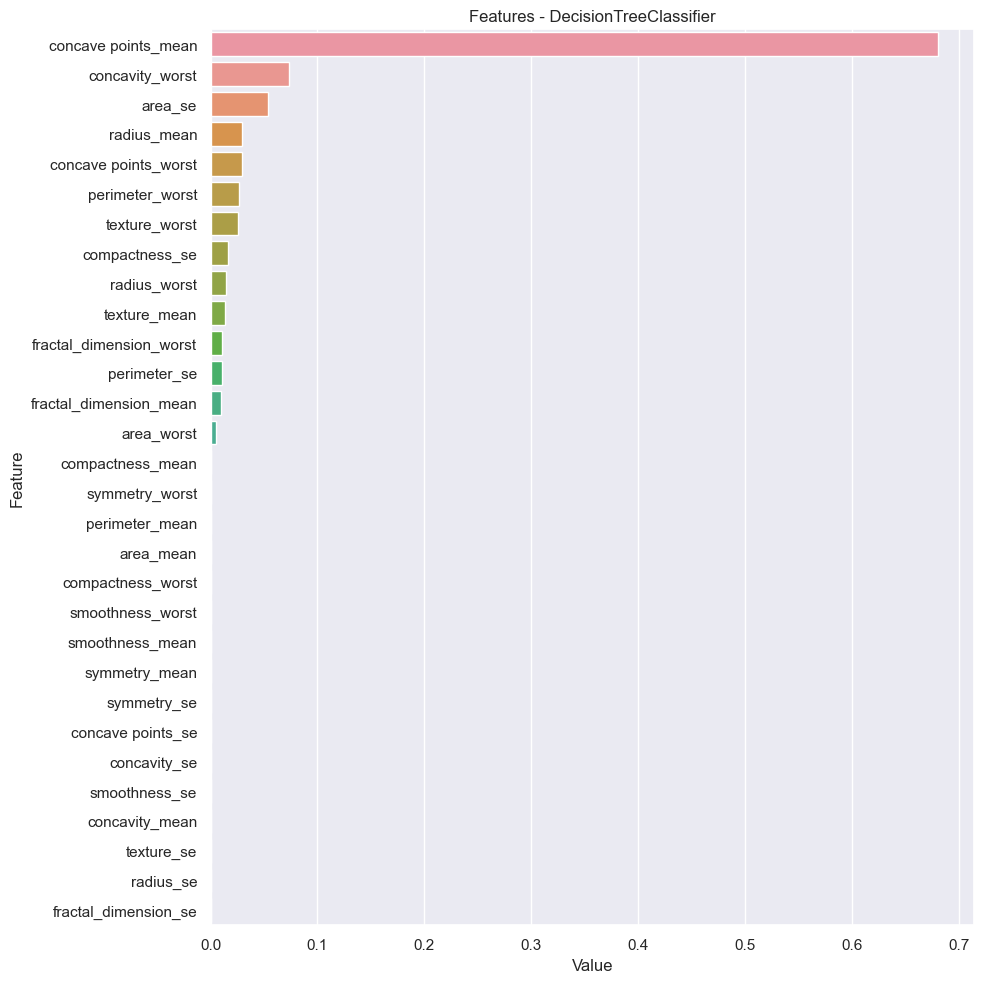

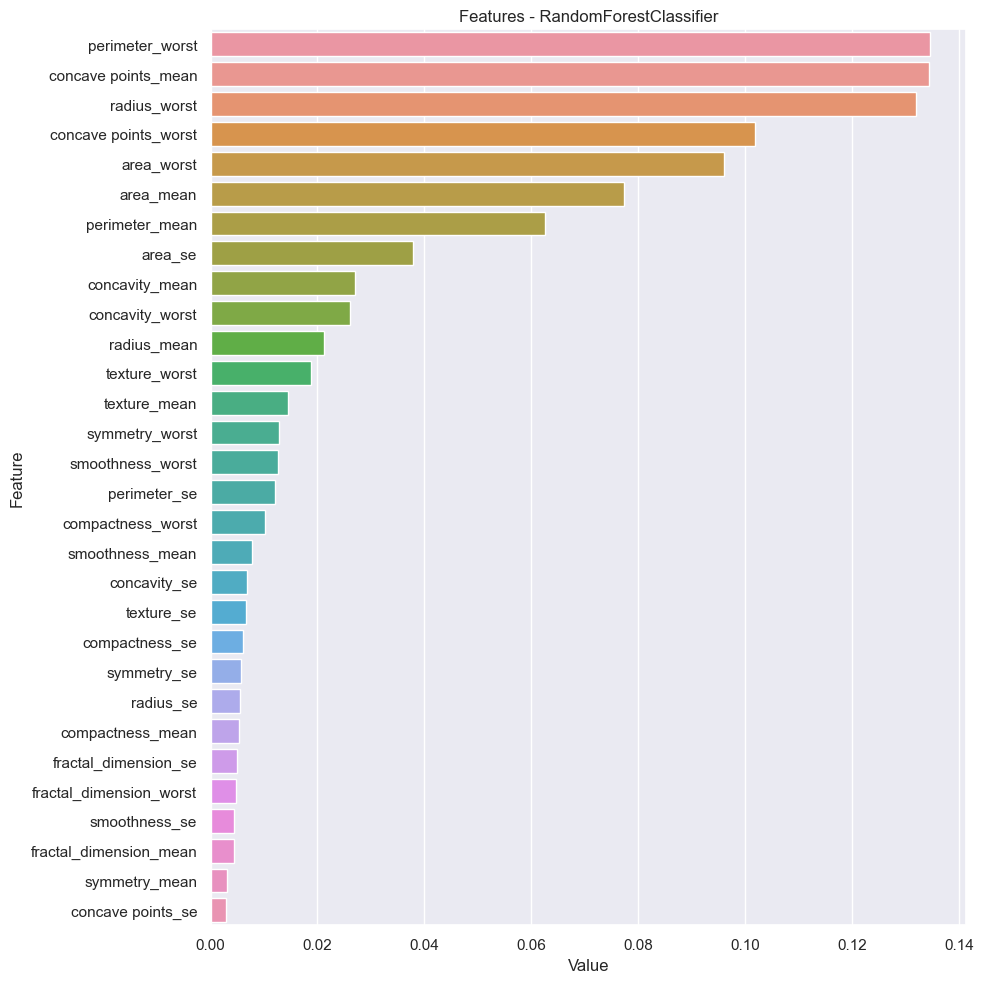

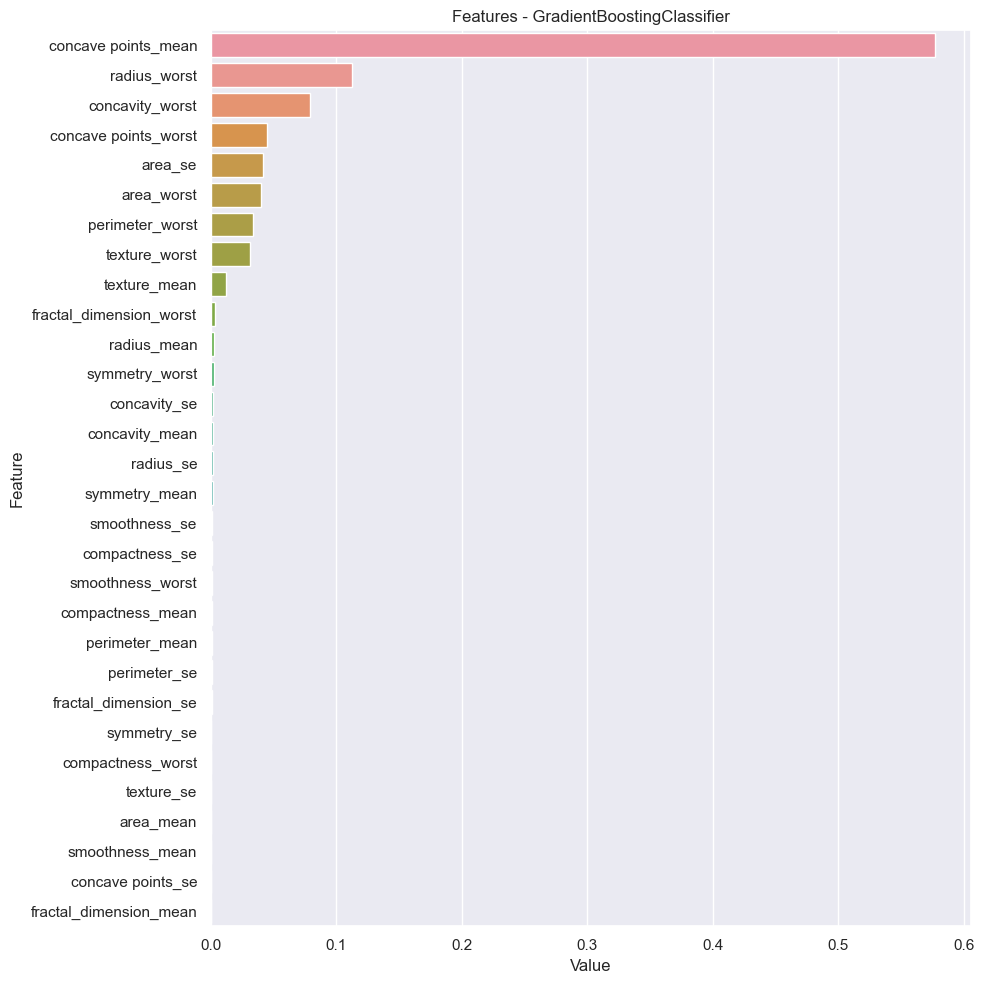

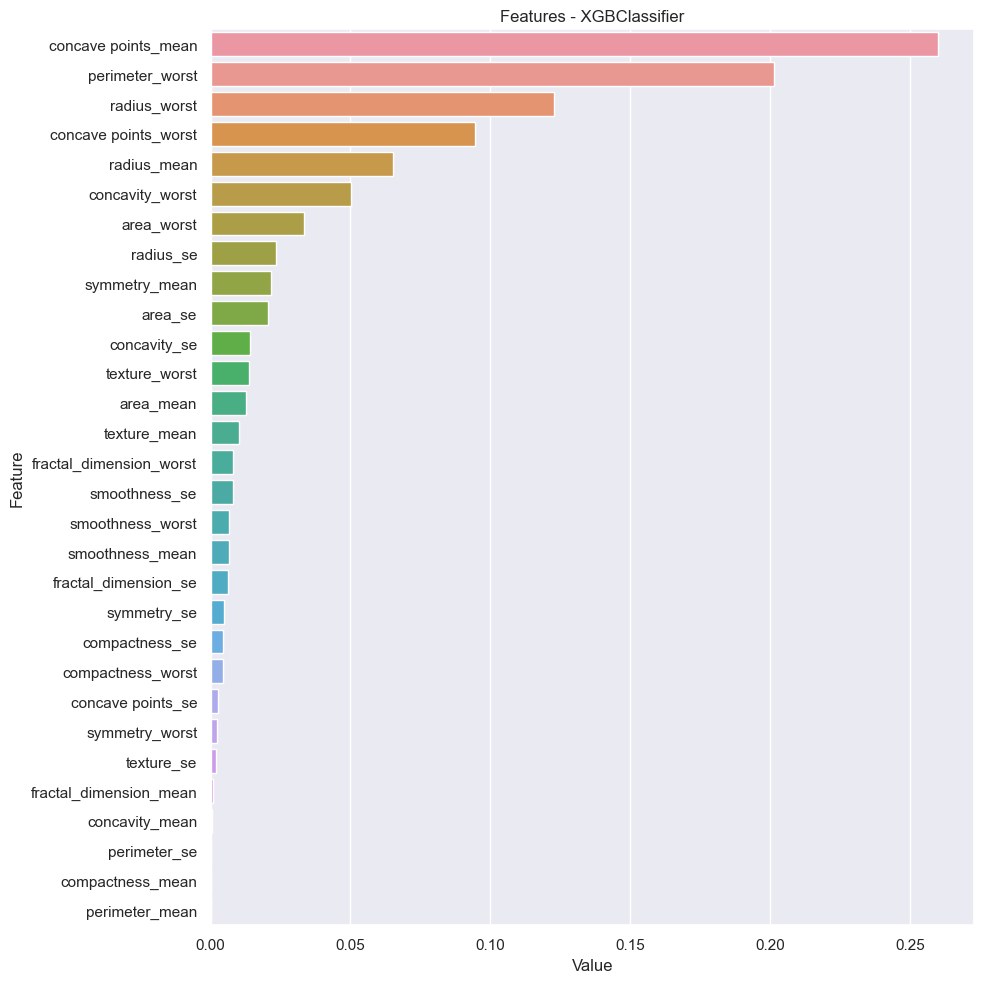

In [50]:
def plot_importance(model, features,modelName, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title('Features'+ ' - ' + modelName.__name__ )
    plt.tight_layout()
    plt.show()

for i in models[3:]:
    model=i().fit(X_train,y_train)
    plot_importance(model, X_train,i)

# Model Evaluation

In [51]:
# Model Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [53]:
print("\n-------------------- Best Parameters after Grid Search --------------------")
print(grid_search.best_params_)


-------------------- Best Parameters after Grid Search --------------------
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [57]:
import pickle
# Save the model to a file using pickle
with open('MagicCuredmodel.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)